# Credit Card Defaulter Prediction Using Machine Learning


### Problem statement: 
Predicting whether a customer is defaulting credit payment for the next month

The findings of the project aim to assist financial institutions by addressing the below:
     1) Risk Management:
          - To proactively reduce credit limits of users based on their profile and mitigate losses.
      2) Customer Retention:
            - Retaining customers by providing tailored incentives to low-risk customers using
                customer segmentation.


#### Features
Features:
LIMIT_BAL: continuous. Credit Limit of the person.
SEX: Categorical: 1 = male; 2 = female
EDUCATION: Categorical: 1 = graduate school; 2 = university; 3 = high school; 4 = others
MARRIAGE: 1 = married; 2 = single; 3 = others
AGE: num. continuous. 
PAY_0,PAY_2 to PAY_6: Categorical :-
2: Payment made in full and on time
-1: payment made in full but past the due date0: payment of the minimum amount was made
1: payment amount less than the minimum amount due
2: payment amount is between the minimum amount due and the full amount due
3: payment amount is between one and two months late
4: payment amount is between two and three months late
5: payment amount is between three and four months late
6: payment amount is between four and five months late
7: payment amount is between five and six months late
8: payment amount is between six and seven months (or more) late.
BILL_AMT1 to BILL_AMT6: Amount of bill statements.
PAY_AMT1 to PAY_AMT6: Amount of previous payments 
Target:
Default Categorical
0:The Person will not be in the defaulter list for the next month
1: The Person will  be in the defaulter list for the next month

#### DataSet Source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients​

In [1]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install --upgrade scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f2/30/1299e84d2ba3bc735baf17cebbf5b9d55144243c41b3ec6559ce3cf61e23/scikit_learn-1.4.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 9.3 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.1.post1
    Uninstalling scikit-learn-1.4.1.post1:
      Successfully uninstalled scikit-learn-1.4.1.post1


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
%matplotlib inline

In [5]:
#Load the dataset
df_raw=pd.read_csv('dataset.csv')
df_raw

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
# rename the target column
df_raw.rename(columns={"default.payment.next.month": "default"}, inplace = True)
df_raw

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
#Check for missing values
df_raw.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
print(df_raw.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

In [9]:
#Check for duplicates
dups=df_raw[df_raw.duplicated()]
dups

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [10]:
#Replace 5,6,0 values of education column with 4 indicating other category
#Replace 0 in marriage column with 3 
df_raw['EDUCATION'] = df_raw['EDUCATION'].replace([5, 6, 0], 4)
df_raw['MARRIAGE'] = df_raw['MARRIAGE'].replace([0], 3)

In [11]:
df_raw = df_raw.rename(columns={'PAY_0': 'PAY_1'})

In [12]:
#Check for feature scaling
num_val = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for i in num_val:
    print(i, "range:", df_raw[i].max() - df_raw[i].min())

LIMIT_BAL range: 990000
AGE range: 58
BILL_AMT1 range: 1130091
BILL_AMT2 range: 1053708
BILL_AMT3 range: 1821353
BILL_AMT4 range: 1061586
BILL_AMT5 range: 1008505
BILL_AMT6 range: 1301267
PAY_AMT1 range: 873552
PAY_AMT2 range: 1684259
PAY_AMT3 range: 896040
PAY_AMT4 range: 621000
PAY_AMT5 range: 426529
PAY_AMT6 range: 528666


In [13]:
#Replace -2,-1 in PAY_0, PAY_2,PAY_3,PAY_4,PAY_5,PAY_6 columns with 0

df_raw['PAY_1']=df_raw['PAY_1'].replace([-2,-1],0)
df_raw['PAY_2']=df_raw['PAY_2'].replace([-2,-1],0)
df_raw['PAY_3']=df_raw['PAY_3'].replace([-2,-1],0)
df_raw['PAY_4']=df_raw['PAY_4'].replace([-2,-1],0)
df_raw['PAY_5']=df_raw['PAY_5'].replace([-2,-1],0)
df_raw['PAY_6']=df_raw['PAY_6'].replace([-2,-1],0)

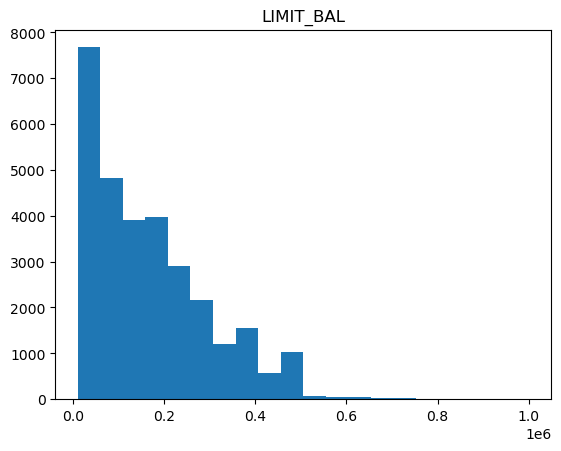

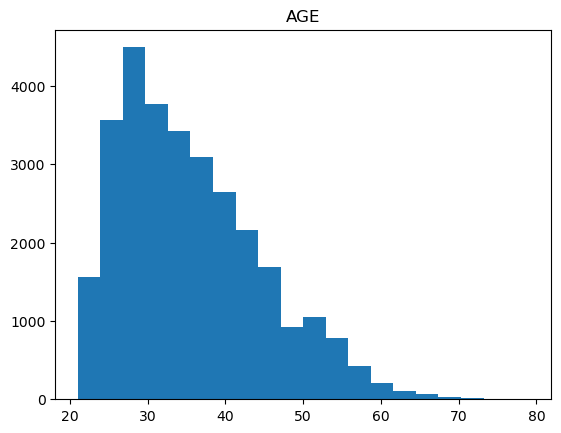

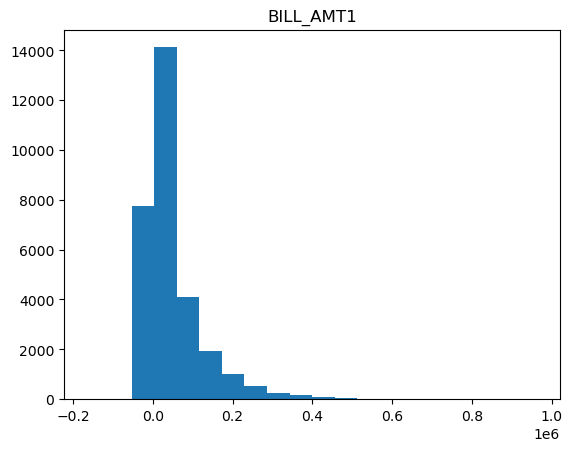

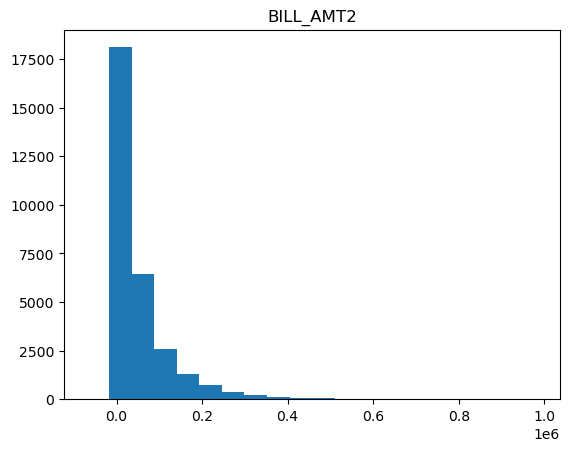

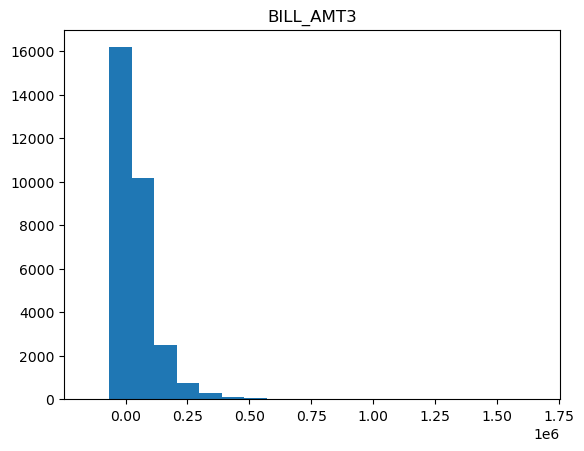

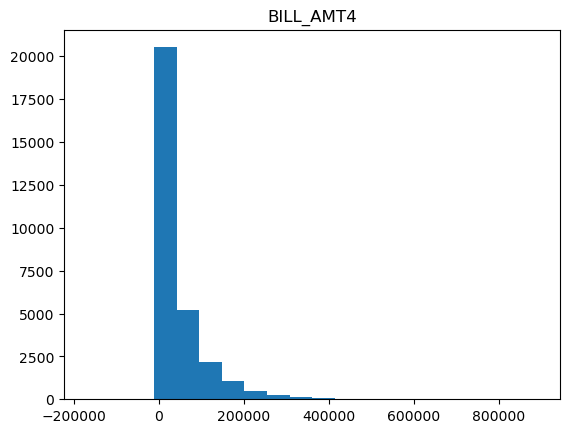

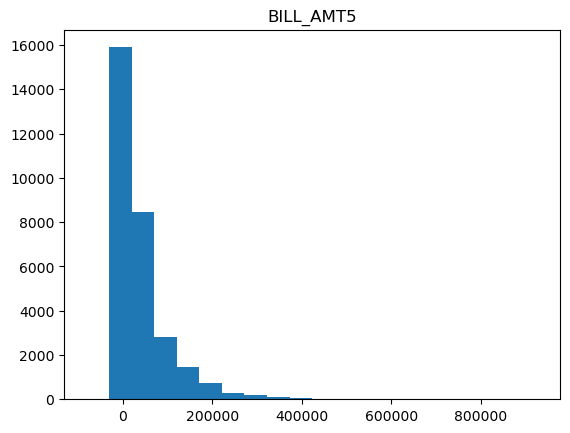

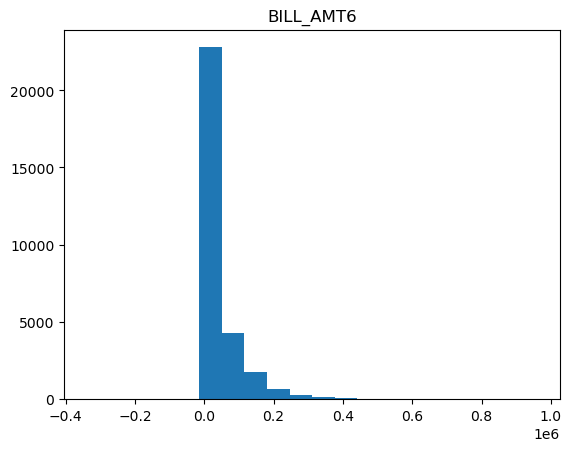

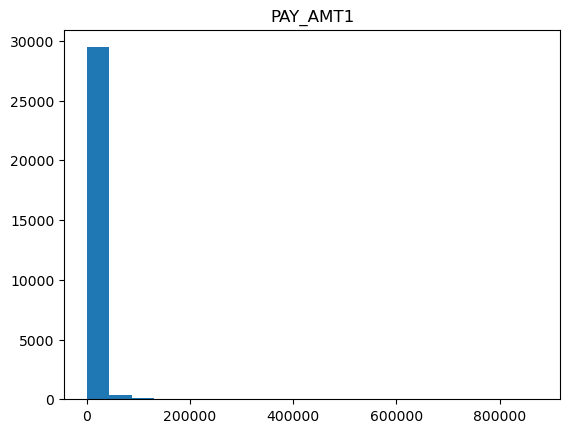

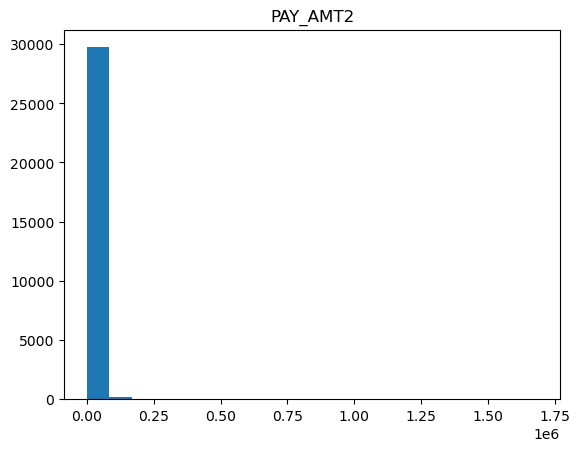

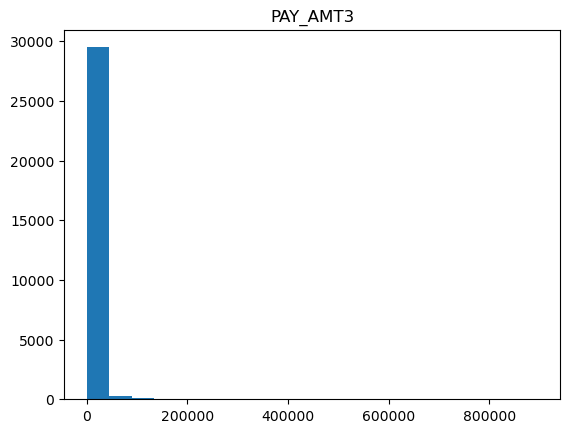

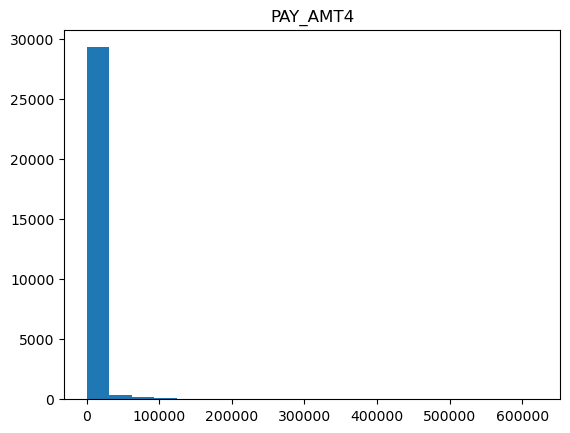

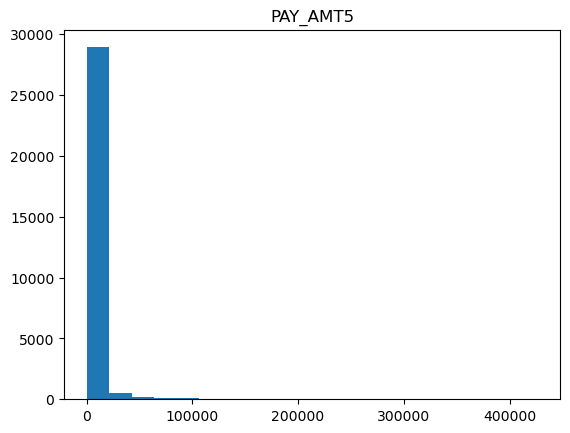

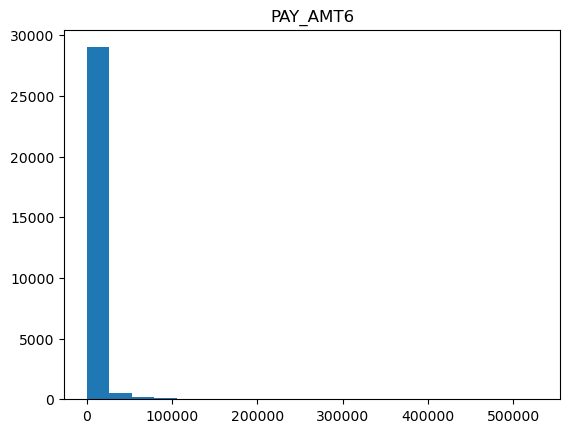

In [14]:
#Plot histograms

for i in num_val:
    pt.hist(df_raw[i], bins=20)
    pt.title(i)
    pt.show()

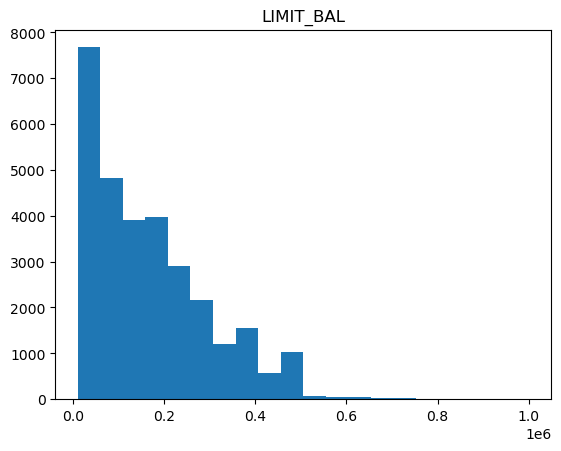

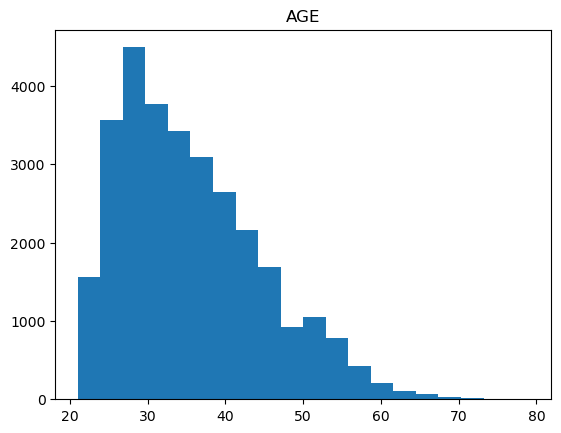

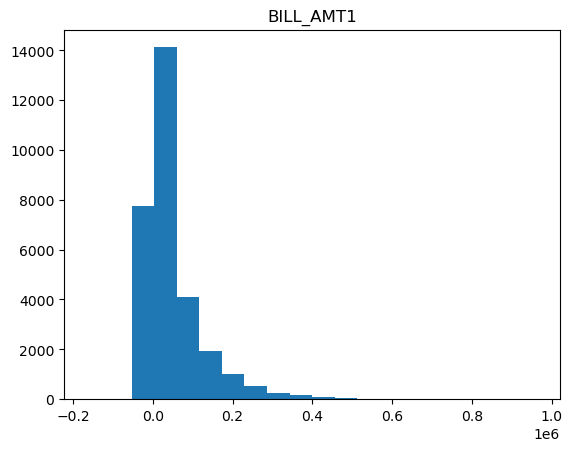

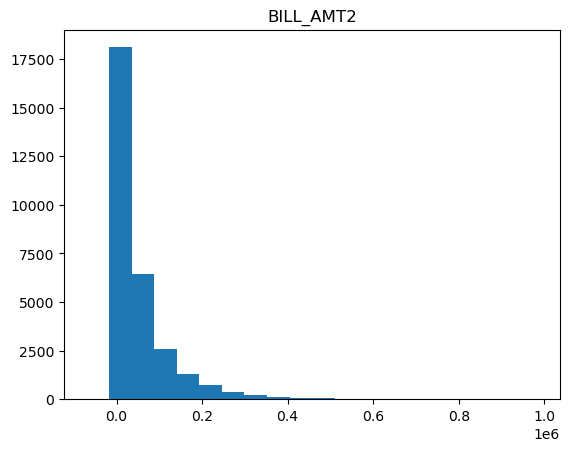

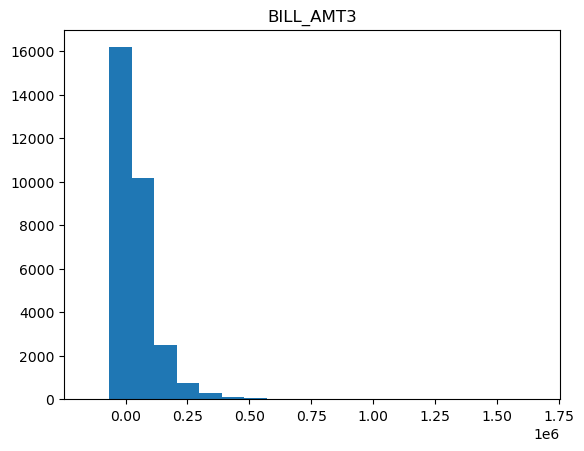

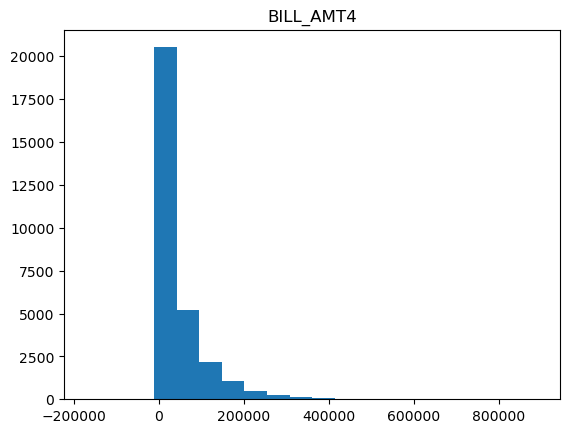

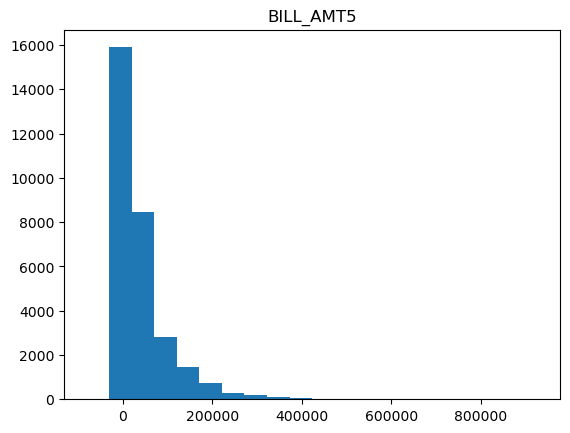

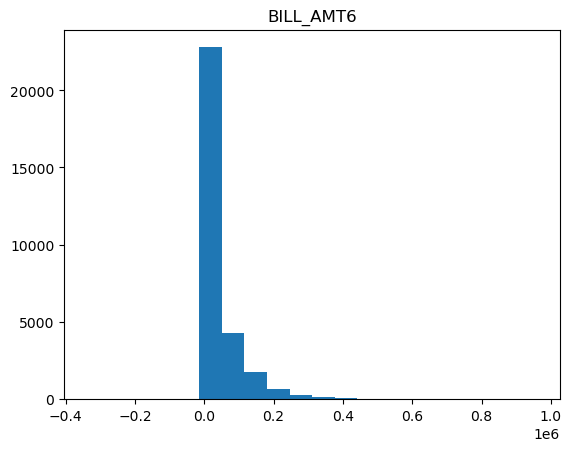

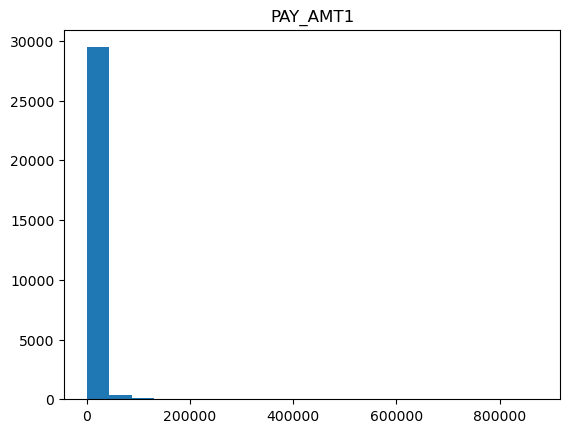

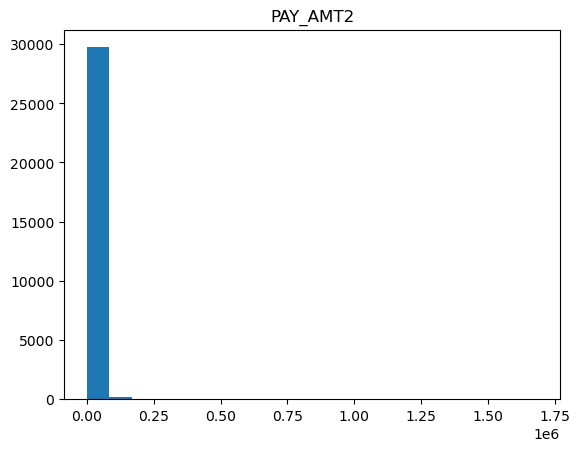

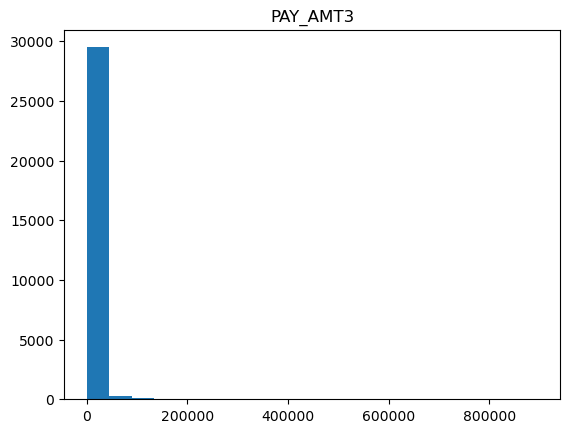

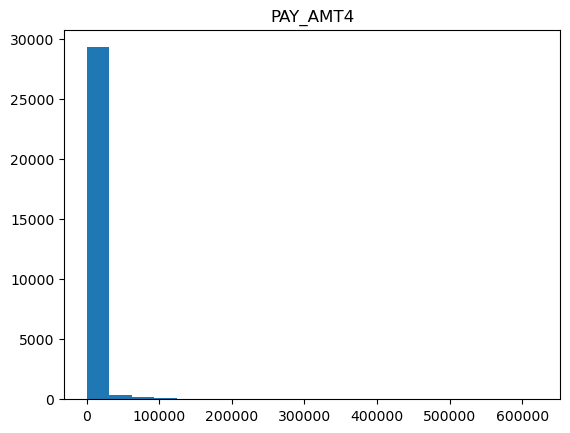

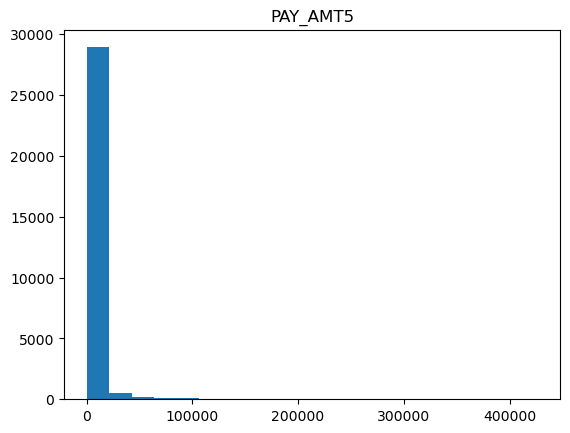

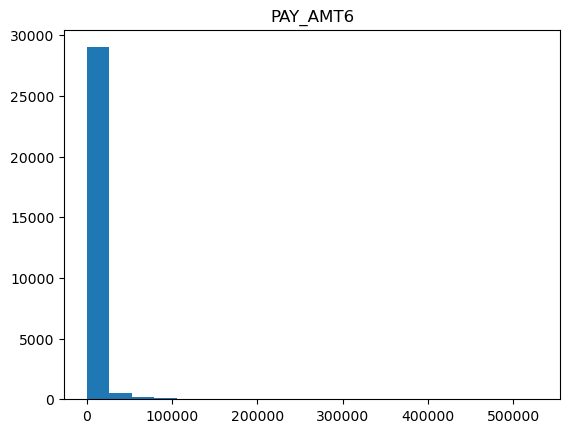

In [15]:
for i in num_val:
    pt.hist(df_raw[i], bins=20)
    pt.title(i)
    pt.show()

In [16]:
print(df_raw.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [17]:
df=df_raw.copy()

## EDA

## Check number of defaulters

In [18]:
#Check number of defaulters
pt.figure(figsize=(6,6))
df['default'].value_counts().plot(kind='bar')
pt.title('Distribution of Default Payment Next Month')
pt.xlabel('Default Payment Next Month')
pt.ylabel('Frequency')
pt.show()

KeyError: 'default'

<Figure size 600x600 with 0 Axes>

default        0     1
EDUCATION             
1           8549  2036
2          10700  3330
3           3680  1237
4            435    33


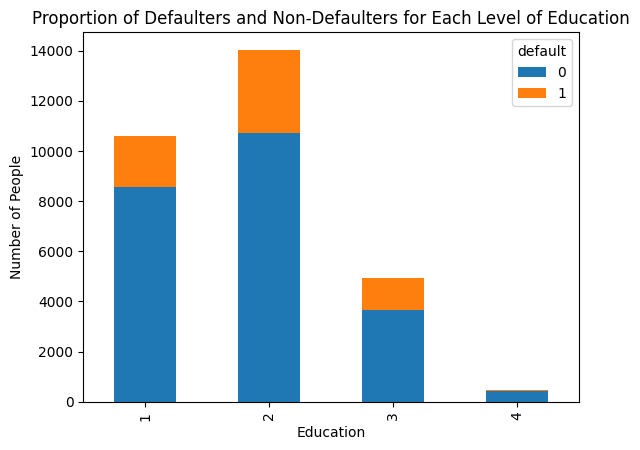

In [155]:
#relation between education and defaulters
ed_d = pd.crosstab(df['EDUCATION'], df['default'])
print(ed_d)
ed_d.plot(kind='bar', stacked=True)
pt.title('Proportion of Defaulters and Non-Defaulters for Each Level of Education')
pt.xlabel('Education')
pt.ylabel('Number of People')
pt.show()

The table shows the number of credit card holders in each education category (1=graduate school, 2=university, 3=high school, 4=others) who either did not default (0) or defaulted (1) on their payments next month.

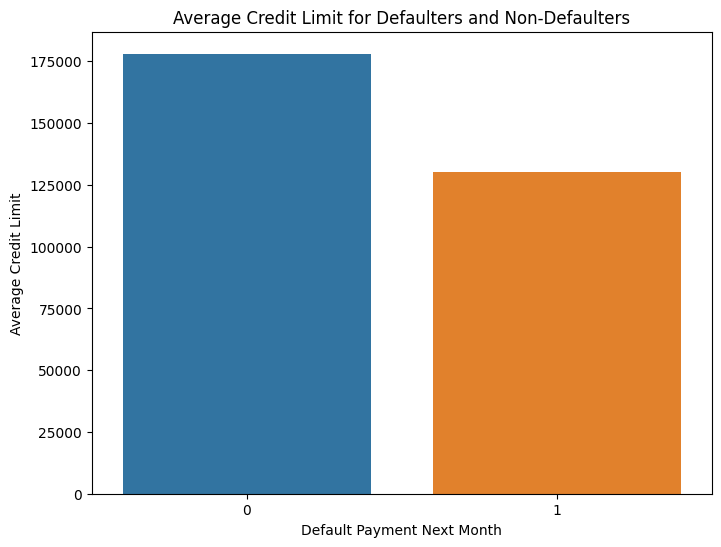

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and the 'default payment next month' column name is 'default_payment'

# Calculate the average credit limit for defaulters and non-defaulters
average_limit_bal = df.groupby('default')['LIMIT_BAL'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='default', y='LIMIT_BAL', data=average_limit_bal)
plt.title('Average Credit Limit for Defaulters and Non-Defaulters')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Average Credit Limit')
plt.show()

In [157]:
#group education and limit balance to find average limit for each level of education
gl = df.groupby('EDUCATION')['LIMIT_BAL'].mean()
print(gl)

EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    181316.239316
Name: LIMIT_BAL, dtype: float64


In [158]:
df_new=df.copy()

In [159]:
#grouping ages and finding average 
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df_new['AGE_RANGE'] = pd.cut(df_new['AGE'], bins=bins, labels=labels)
ga = df_new.groupby('AGE_RANGE')['default'].value_counts()

In [160]:
print(ga)

AGE_RANGE  default
20-29      0          8542
           1          2471
30-39      0          8524
           1          2189
40-49      0          4606
           1          1399
50-59      0          1493
           1           504
60-69      0           189
           1            68
70+        0            10
           1             5
Name: default, dtype: int64


In [161]:
#group limit balance and age 
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
labels = ['<100k', '100-200k', '200-300k', '300-400k', '400-500k', '500-600k', '600-700k', '700-800k', '800-900k', '900k+']
df_new['LIMIT_RANGE'] = pd.cut(df_new['LIMIT_BAL'], bins=bins, labels=labels)
gal = df_new.groupby('LIMIT_RANGE')['AGE'].mean()

In [162]:
print(gal)

LIMIT_RANGE
<100k       34.331733
100-200k    35.338071
200-300k    36.551888
300-400k    37.010149
400-500k    38.745307
500-600k    39.283465
600-700k    37.928571
700-800k    41.863636
800-900k          NaN
900k+       47.000000
Name: AGE, dtype: float64


In [163]:
df = df.dropna()

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bins for credit limits
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000]


# Bin the LIMIT_BAL column into the defined bins
df['LIMIT_BAL_binned'] = pd.cut(df['LIMIT_BAL'], bins=bins)

# Count the number of customers in each bin
limit_bal_distribution = df['LIMIT_BAL_binned'].value_counts().sort_index()

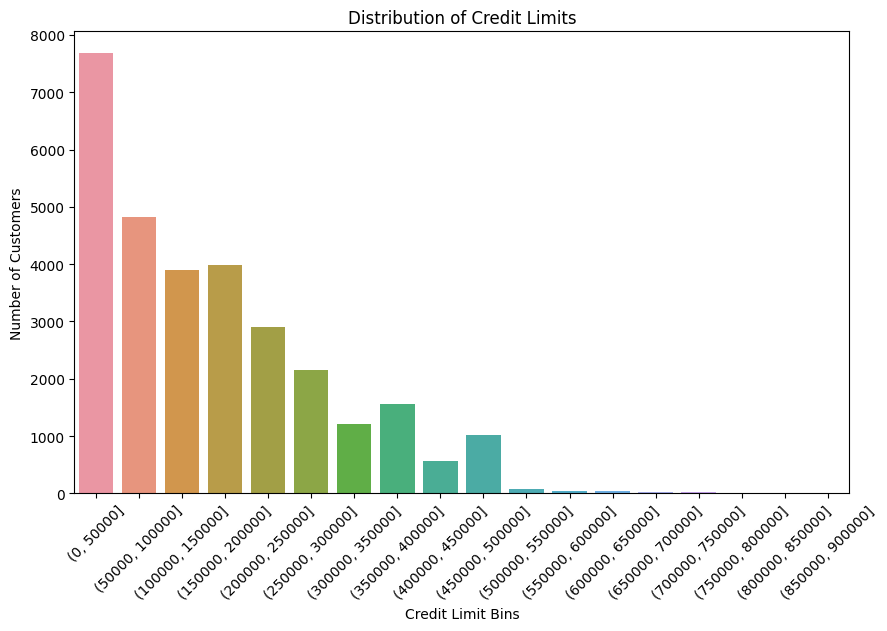

In [165]:
# Bar plot of the binned credit limits
plt.figure(figsize=(10, 6))
sns.barplot(x=limit_bal_distribution.index, y=limit_bal_distribution.values)
plt.title('Distribution of Credit Limits')
plt.xlabel('Credit Limit Bins')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

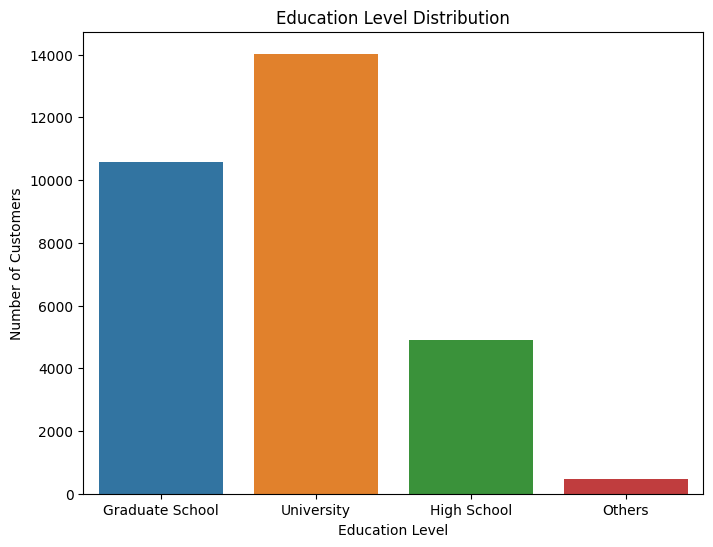

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the education distribution
education_distribution = df['EDUCATION'].value_counts().sort_index()

# Prepare the data for the bar plot
education_labels = ['Graduate School', 'University', 'High School', 'Others']

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=education_labels, y=education_distribution.values)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.show()

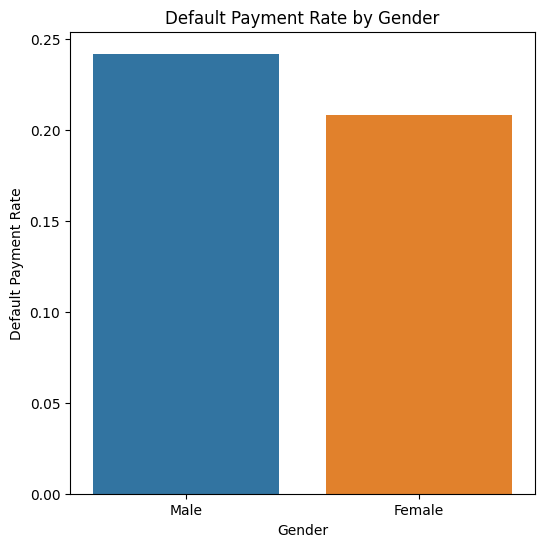

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the default rate for each gender
gender_default = df.groupby('SEX')['default'].mean()

# Prepare the data for the bar plot
gender_labels = ['Male', 'Female']
default_rate = [gender_default[1], gender_default[2]]

# Create the bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x=gender_labels, y=default_rate)
plt.title('Default Payment Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Default Payment Rate')
plt.show()

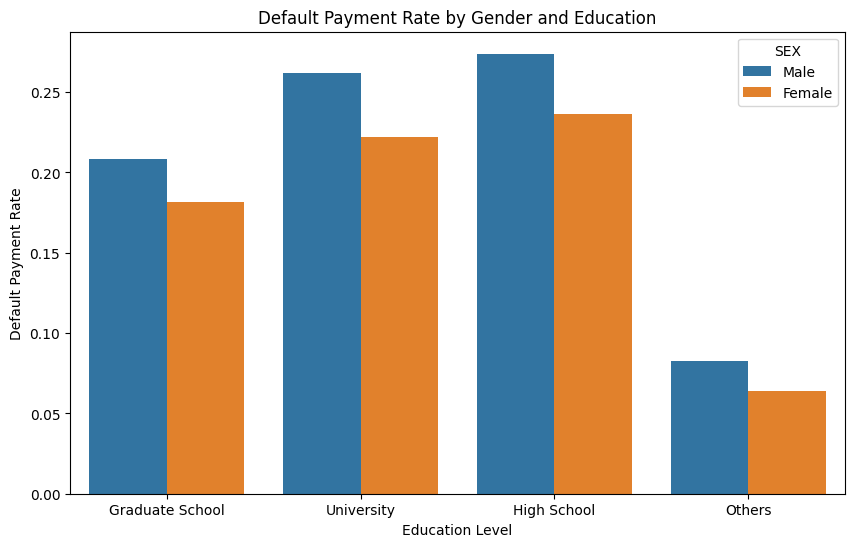

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the default rate for each combination of gender and education
gender_education_default = df.groupby(['SEX', 'EDUCATION'])['default'].mean().reset_index()

# Map the numeric values to categorical labels
gender_mapping = {1: 'Male', 2: 'Female'}
education_mapping = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'}

gender_education_default['SEX'] = gender_education_default['SEX'].map(gender_mapping)
gender_education_default['EDUCATION'] = gender_education_default['EDUCATION'].map(education_mapping)

# Create the bar plot with hue
plt.figure(figsize=(10, 6))
sns.barplot(x='EDUCATION', y='default', hue='SEX', data=gender_education_default)
plt.title('Default Payment Rate by Gender and Education')
plt.xlabel('Education Level')
plt.ylabel('Default Payment Rate')
plt.show()

<ipython-input-169-b82098f0b2cf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  repayment_data = repayment_data.append(counts, ignore_index=True)
<ipython-input-169-b82098f0b2cf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  repayment_data = repayment_data.append(counts, ignore_index=True)
<ipython-input-169-b82098f0b2cf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  repayment_data = repayment_data.append(counts, ignore_index=True)
<ipython-input-169-b82098f0b2cf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  repayment_data = repayment_data.append(counts, ignore_index=True)
<ipython-input-169-b82098f0b2cf>:15: FutureWarni

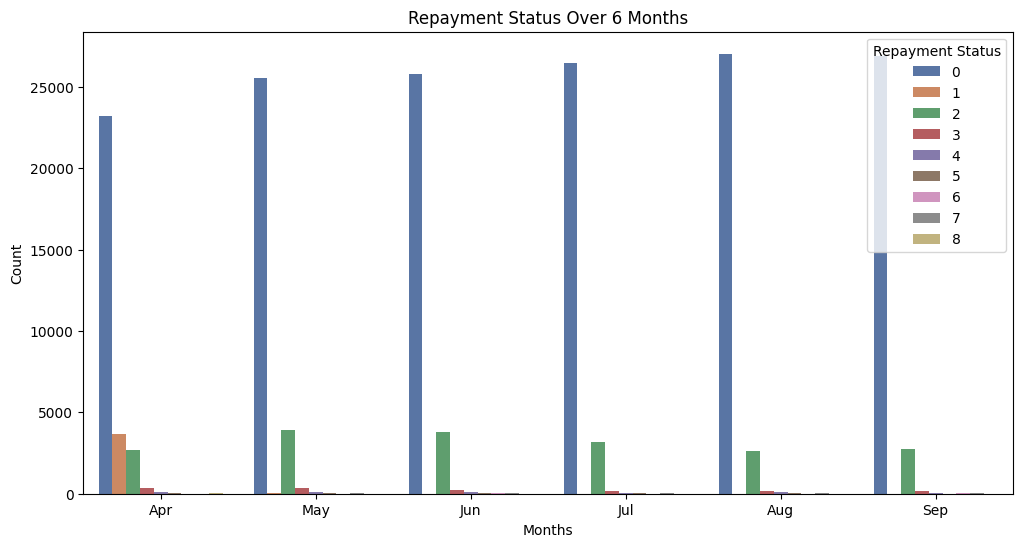

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for the bar plot
pay_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

repayment_data = pd.DataFrame(columns=['Month', 'Status', 'Count'])

for idx, col in enumerate(pay_columns):
    counts = df[col].value_counts().reset_index()
    counts.columns = ['Status', 'Count']
    counts['Month'] = months[idx]
    repayment_data = repayment_data.append(counts, ignore_index=True)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=repayment_data, x='Month', y='Count', hue='Status', palette='deep')
plt.title('Repayment Status Over 6 Months')
plt.xlabel('Months')
plt.ylabel('Count')
plt.legend(title='Repayment Status', loc='upper right')
plt.show()

Finding the remaining balances over the months

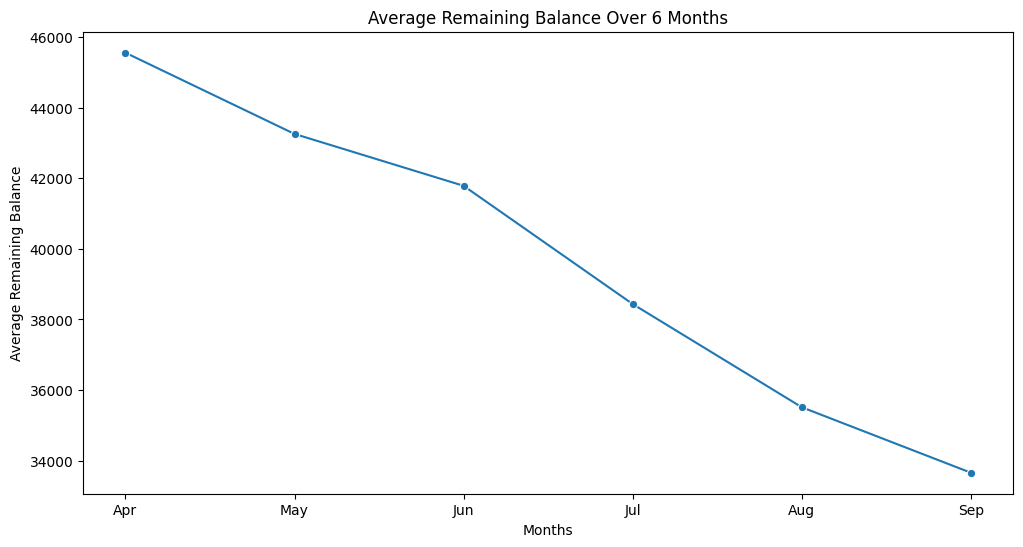

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the remaining balance for each month
df['REMAINING_BAL_1'] = df['BILL_AMT1'] - df['PAY_AMT1']
df['REMAINING_BAL_2'] = df['BILL_AMT2'] - df['PAY_AMT2']
df['REMAINING_BAL_3'] = df['BILL_AMT3'] - df['PAY_AMT3']
df['REMAINING_BAL_4'] = df['BILL_AMT4'] - df['PAY_AMT4']
df['REMAINING_BAL_5'] = df['BILL_AMT5'] - df['PAY_AMT5']
df['REMAINING_BAL_6'] = df['BILL_AMT6'] - df['PAY_AMT6']

# Calculate the average remaining balance for each month
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
avg_remaining_bal = [
    df['REMAINING_BAL_1'].mean(),
    df['REMAINING_BAL_2'].mean(),
    df['REMAINING_BAL_3'].mean(),
    df['REMAINING_BAL_4'].mean(),
    df['REMAINING_BAL_5'].mean(),
    df['REMAINING_BAL_6'].mean(),
]

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=months, y=avg_remaining_bal, marker='o')
plt.title('Average Remaining Balance Over 6 Months')
plt.xlabel('Months')
plt.ylabel('Average Remaining Balance')
plt.show()

What is the average, minimum, and maximum billed amount (BILL_AMT1 to BILL_AMT6) for each month? Are there any significant fluctuations or trends?

In [171]:
import pandas as pd
import matplotlib.pyplot as plt


# Select the columns for billed amounts (BILL_AMT1 to BILL_AMT6)
billed_amount_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Calculate the average, minimum, and maximum billed amount for each month
billed_amount_stats = df[billed_amount_columns].agg(['mean', 'min', 'max'])

# Transpose the DataFrame to have months as columns
billed_amount_stats = billed_amount_stats.T

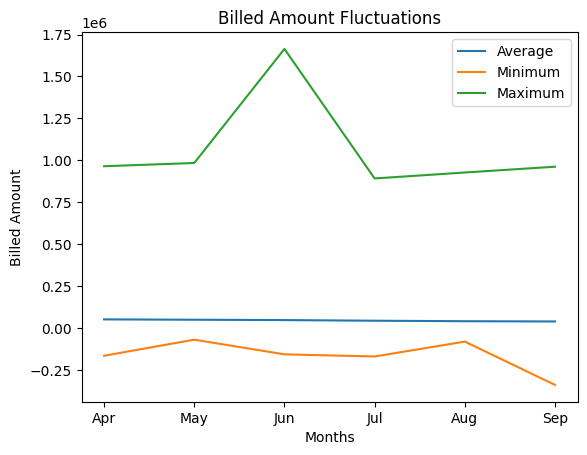

In [172]:
# Create a line plot
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']  # Assuming the columns correspond to April to September
plt.plot(months, billed_amount_stats['mean'], label='Average')
plt.plot(months, billed_amount_stats['min'], label='Minimum')
plt.plot(months, billed_amount_stats['max'], label='Maximum')

# Set plot labels
plt.xlabel('Months')
plt.ylabel('Billed Amount')
plt.title('Billed Amount Fluctuations')
plt.legend()

# Display the plot
plt.show()

## Finding relation between marital status and defaul payment next month

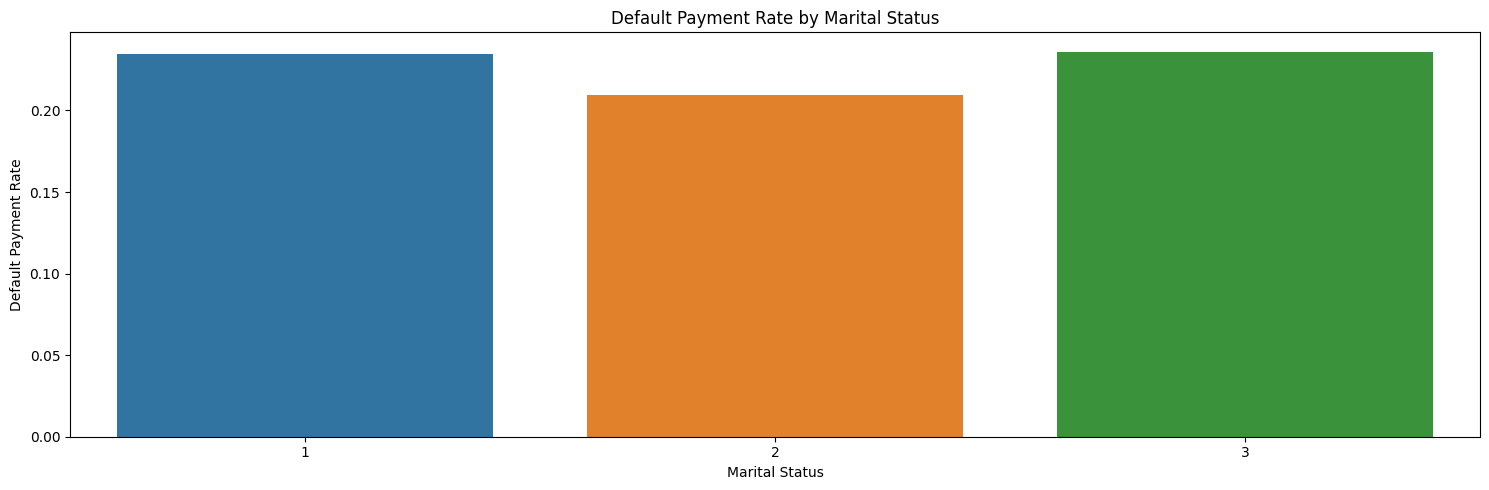

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a function to generate bar plots for different categories
def plot_default_rate_by_category(category, category_name, ax):
    # Calculate the default rate for each category
    default_rate = df.groupby(category)['default'].mean().reset_index()

    # Create the bar plot
    sns.barplot(x=category, y='default', data=default_rate, ax=ax)
    ax.set_title('Default Payment Rate by {}'.format(category_name))
    ax.set_xlabel('{}'.format(category_name))
    ax.set_ylabel('Default Payment Rate')

# Create the subplots
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

# Generate bar plots for gender, education, and marital status

plot_default_rate_by_category('MARRIAGE', 'Marital Status', ax1)

plt.tight_layout()
plt.show()


From the above graph, divorced or widowed category has the highest default rate



Are there any significant differences in the repayment behavior based on age, gender, education level, and marital status?

<ipython-input-174-332e9c3b3a78>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_data, x='age_group', y='default_rate', hue='SEX', ci=None)


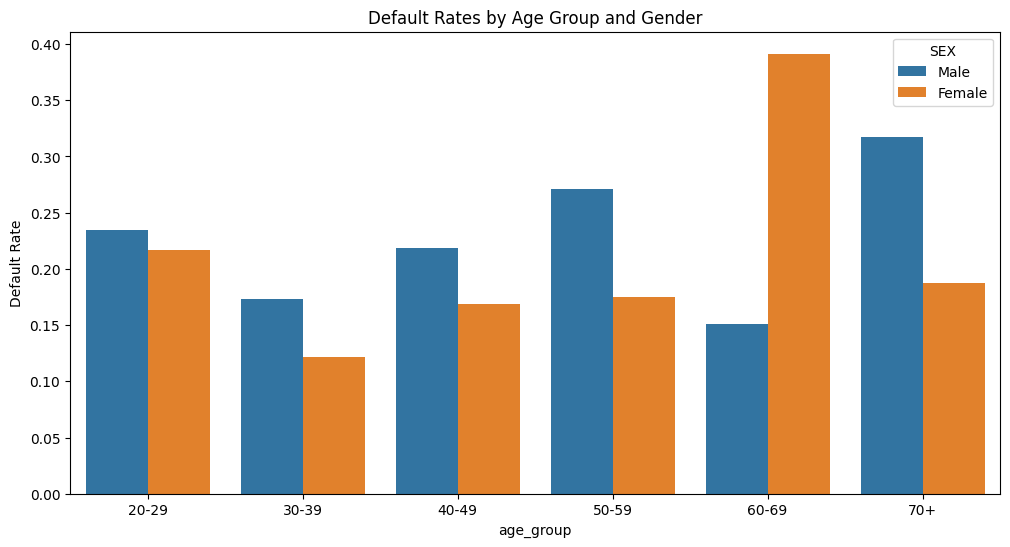

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# data = pd.read_csv("your_data_file.csv")

# Same preprocessing steps as before
df_new['age_group'] = pd.cut(df['AGE'], bins=[20, 29, 39, 49, 59, 69, 100], labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70+'])
grouped_data = df_new.groupby(['SEX', 'EDUCATION', 'MARRIAGE', 'age_group']).agg({'default': ['count', 'sum']})
grouped_data.columns = ['total_count', 'default_count']
grouped_data['default_rate'] = grouped_data['default_count'] / grouped_data['total_count']
grouped_data.reset_index(inplace=True)
grouped_data.replace({'SEX': {1: 'Male', 2: 'Female'},
                      'EDUCATION': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'},
                      'MARRIAGE': {1: 'Married', 2: 'Single', 3: 'Others'}}, inplace=True)

# Bar plot of default rates across demographic groups
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='age_group', y='default_rate', hue='SEX', ci=None)
plt.title('Default Rates by Age Group and Gender')
plt.ylabel('Default Rate')
plt.show()


In [175]:
print(grouped_data.sort_values('default_rate', ascending=False))

        SEX        EDUCATION MARRIAGE age_group  total_count  default_count  \
106  Female       University   Others     60-69            1              1   
100  Female       University   Single     60-69            4              3   
41     Male      High School  Married       70+            3              2   
84   Female  Graduate School   Others     20-29            5              3   
95   Female       University  Married       70+            2              1   
..      ...              ...      ...       ...          ...            ...   
137  Female           Others   Single       70+            0              0   
138  Female           Others   Others     20-29            0              0   
141  Female           Others   Others     50-59            0              0   
142  Female           Others   Others     60-69            0              0   
143  Female           Others   Others       70+            0              0   

     default_rate  
106      1.000000  
100      0.

it appears that:

Females with a University education in the age group 60-69, who fall under the "Others" marital status category, have the highest default rate of 100% (1 out of 1 defaulted). The second highest default rate is among females with a University education in the age group 60-69, who are single. The default rate for this category is 75% (3 out of 4 defaulted). Males with a High School education who are married and in the age group 70+ have a default rate of 66.67% (2 out of 3 defaulted). Females with a Graduate School education in the age group 20-29, who fall under the "Others" marital status category, have a default rate of 60% (3 out of 5 defaulted). Females with a High School education in the age group 50-59, who fall under the "Others" marital status category, have a default rate of 52.63% (10 out of 19 defaulted).

<ipython-input-176-551dcf7d83a8>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=grouped_data, x='age_group', y='default_rate', hue='SEX', col='EDUCATION', kind='bar', ci=None, height=5, aspect=1)


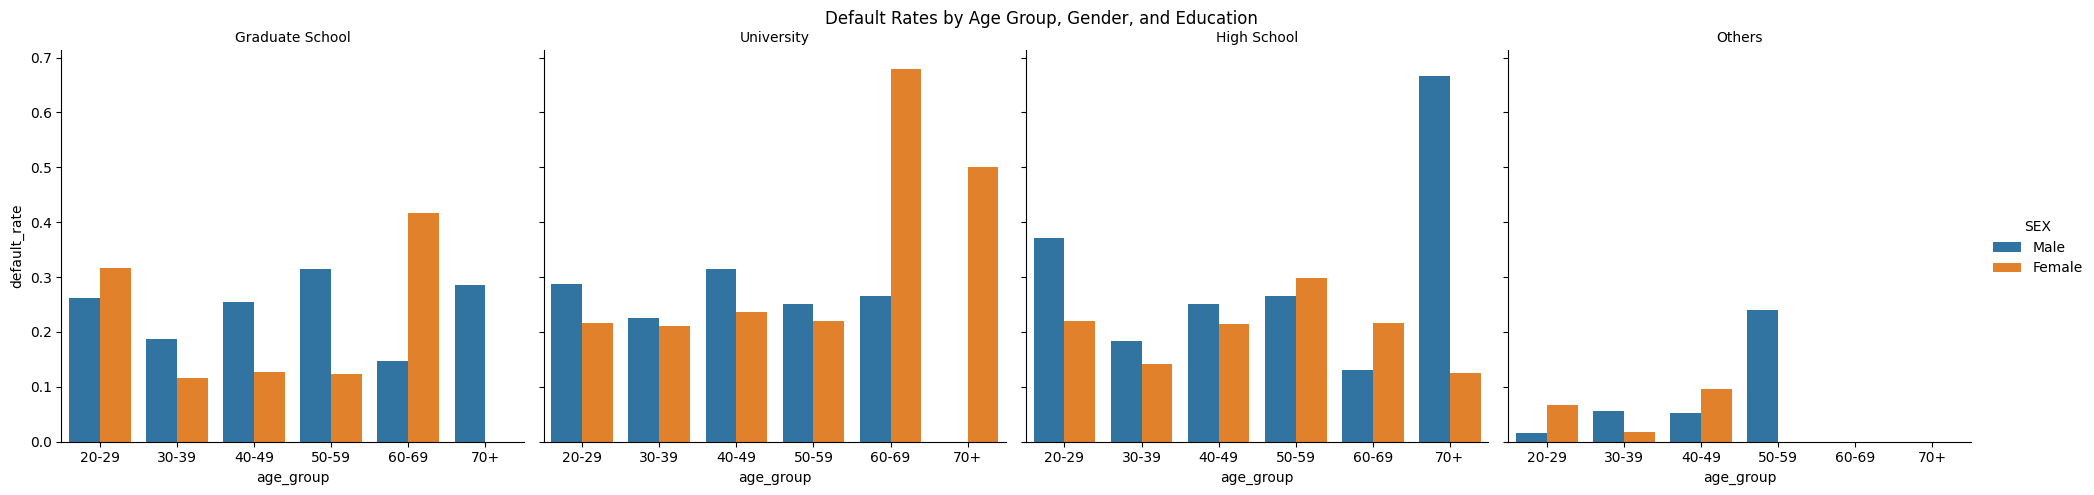

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# data = pd.read_csv("your_data_file.csv")

# Same preprocessing steps as before
df['age_group'] = pd.cut(df['AGE'], bins=[20, 29, 39, 49, 59, 69, 100], labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70+'])
grouped_data = df.groupby(['SEX', 'EDUCATION', 'MARRIAGE', 'age_group']).agg({'default': ['count', 'sum']})
grouped_data.columns = ['total_count', 'default_count']
grouped_data['default_rate'] = grouped_data['default_count'] / grouped_data['total_count']
grouped_data.reset_index(inplace=True)
grouped_data.replace({'SEX': {1: 'Male', 2: 'Female'},
                      'EDUCATION': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'},
                      'MARRIAGE': {1: 'Married', 2: 'Single', 3: 'Others'}}, inplace=True)

# Catplot of default rates across demographic groups, including education
g = sns.catplot(data=grouped_data, x='age_group', y='default_rate', hue='SEX', col='EDUCATION', kind='bar', ci=None, height=5, aspect=1)
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Default Rates by Age Group, Gender, and Education')
plt.ylabel('Default Rate')
plt.show()


## FEATURE SCALING

In [177]:
#change datatype of categorical fetaures
df_raw['EDUCATION'] = df_raw['EDUCATION'].astype('category')
df_raw['SEX'] = df_raw['SEX'].astype('category')
df_raw['MARRIAGE'] = df_raw['MARRIAGE'].astype('category')

In [178]:
import pandas as pd

# Define the columns to encode
cat_cols = ['EDUCATION', 'MARRIAGE', 'SEX', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Perform one hot encoding on the categorical columns
en_df = pd.get_dummies(df_raw, columns=cat_cols)
en_df = en_df.drop('ID',axis=1)
en_df

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_5_8,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,0,1,0,0,0,0,0,0,0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,1,0,0,0,0,0,0
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,1,0,0,0,0,0,0,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,...,0,0,1,0,0,0,0,0,0,0
29996,150000.0,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,...,0,0,1,0,0,0,0,0,0,0
29997,30000.0,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
29998,80000.0,41,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,...,0,0,1,0,0,0,0,0,0,0


In [179]:
df_final=en_df.copy()

In [13]:
class_distribution = df_final['default'].value_counts()
class_distribution

NameError: name 'df_final' is not defined

In [181]:
print(df_final.dtypes)

LIMIT_BAL    float64
AGE            int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
              ...   
PAY_6_4        uint8
PAY_6_5        uint8
PAY_6_6        uint8
PAY_6_7        uint8
PAY_6_8        uint8
Length: 76, dtype: object


### Above results display that the class is imbalanced

## BASE MODEL

In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [14]:
# Separate the features and target variable
X = df_final.drop(["default"],axis=1)
y = df_final["default"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(classification_report(y_test, y_pred))



NameError: name 'df_final' is not defined

When logistic regression model is implemented using imbalnced dataset the precision we observed is 0 so we tried sampling techniques to balance the dataset 
sampling techniques we employed:
smote
oversampling
undersampling

after performing all 3 techniques we by comparing metrics we choose the best performing model

## WITH SMOTE 

In [184]:
# Instantiate the SMOTE oversampler
oversampler = SMOTE()

# Perform oversampling on the training set
X_smote_resampled, y_smote_resampled = oversampler.fit_resample(X_train, y_train)

In [185]:
#check for instances in each class after sampling
print('Class distribution before oversampling:\n{}'.format(y_train.value_counts()))
print('\nClass distribution after oversampling:\n{}'.format(y_smote_resampled.value_counts()))

Class distribution before oversampling:
0    16324
1     4676
Name: default, dtype: int64

Class distribution after oversampling:
1    16324
0    16324
Name: default, dtype: int64


[[3535 3505]
 [ 521 1439]]


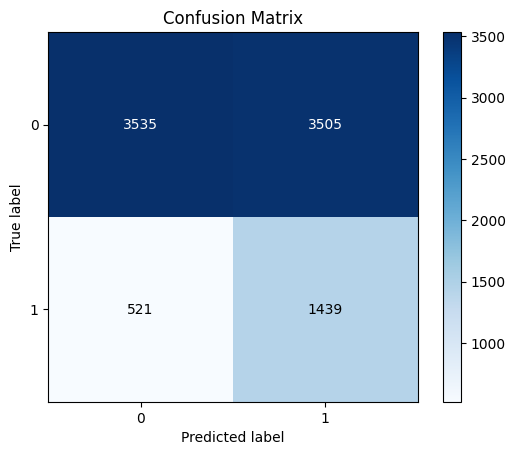

 Smote classification report for train
              precision    recall  f1-score   support

           0       0.66      0.49      0.57     16324
           1       0.60      0.75      0.66     16324

    accuracy                           0.62     32648
   macro avg       0.63      0.62      0.62     32648
weighted avg       0.63      0.62      0.62     32648

Smote classification report for test 
              precision    recall  f1-score   support

           0       0.87      0.50      0.64      7040
           1       0.29      0.73      0.42      1960

    accuracy                           0.55      9000
   macro avg       0.58      0.62      0.53      9000
weighted avg       0.75      0.55      0.59      9000



In [186]:
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Run the logistic regression model
logreg = LogisticRegression()

scaler = StandardScaler() #To scale data
X_smote_resampled_s = scaler.fit_transform(X_smote_resampled[num_val])
X_test_s = scaler.transform(X_test[num_val])

logreg.fit(X_smote_resampled_s, y_smote_resampled)
y_pred = logreg.predict(X_test_s)
y_train_pred=logreg.predict(X_smote_resampled_s)

cm = confusion_matrix(y_test, y_pred)
print(cm)

skplt.metrics.plot_confusion_matrix(y_test, y_pred)
pt.show()

print(" Smote classification report for train")
print(classification_report(y_smote_resampled,y_train_pred))
print("Smote classification report for test ")
print(classification_report(y_test, y_pred))


## OVERSAMPLING

In this oversampling technique random sample are choose from minority class duplicated and added to training dataset

In [187]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

# Instantiate a RandomOverSampler object
ros = RandomOverSampler(random_state=0)


# Apply oversampling to the training data
X_over_resampled, y_over_resampled = ros.fit_resample(X_train, y_train)
scaler = StandardScaler() #To scale data
X_over_resampled_s = scaler.fit_transform(X_over_resampled[num_val])


# Create a logistic regression model
lr = LogisticRegression()

# Fit the model on the resampled training data
lr.fit(X_over_resampled_s, y_over_resampled)
y_train_pred=logreg.predict(X_over_resampled_s)

# Evaluate the model on the test data
y_pred = lr.predict(X_test_s)
print(" Oversampling classification report for train")
print(classification_report(y_over_resampled,y_train_pred))
print("Oversampling classification report for test ")
print(classification_report(y_test, y_pred))

 Oversampling classification report for train
              precision    recall  f1-score   support

           0       0.65      0.49      0.56     16324
           1       0.59      0.74      0.66     16324

    accuracy                           0.61     32648
   macro avg       0.62      0.61      0.61     32648
weighted avg       0.62      0.61      0.61     32648

Oversampling classification report for test 
              precision    recall  f1-score   support

           0       0.87      0.50      0.64      7040
           1       0.29      0.72      0.41      1960

    accuracy                           0.55      9000
   macro avg       0.58      0.61      0.52      9000
weighted avg       0.74      0.55      0.59      9000



The model achieved an accuracy of 0.55, meaning that 55% of the predictions were correct.The precision for class 0 is 0.87, indicating that out of all the predicted 0's, 87% were actually 0's. The recall for class 0 is 0.50, indicating that out of all the actual 0's, only 50% were correctly identified by the model. The F1-score for class 0 is 0.63, which is the harmonic mean of precision and recall.For class 1, the precision is 0.29, meaning that out of all the predicted 1's, only 29% were actually 1's. The recall for class 1 is 0.73, indicating that out of all the actual 1's, 73% were correctly identified by the model. The F1-score for class 1 is 0.41.

## WITH UNDERSAMPLING

In [188]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Resample the data using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under_resampled, y_under_resampled = rus.fit_resample(X_train, y_train)

scaler = StandardScaler() #To scale continuous features before feeding to model
X_under_resampled_s = scaler.fit_transform(X_under_resampled[num_val])

# Perform logistic regression
logreg = LogisticRegression()
logreg.fit(X_under_resampled_s, y_under_resampled)
y_train_pred=logreg.predict(X_under_resampled_s)

# Make predictions on the test set
y_pred = logreg.predict(X_test_s)

# Evaluate the performance of the model
print(" Undersampling classification report for train")
print(classification_report(y_under_resampled,y_train_pred))
print("Undersampling classification report for test ")
print(classification_report(y_test, y_pred))

 Undersampling classification report for train
              precision    recall  f1-score   support

           0       0.64      0.50      0.56      4676
           1       0.59      0.72      0.65      4676

    accuracy                           0.61      9352
   macro avg       0.62      0.61      0.61      9352
weighted avg       0.62      0.61      0.61      9352

Undersampling classification report for test 
              precision    recall  f1-score   support

           0       0.87      0.51      0.64      7040
           1       0.29      0.72      0.41      1960

    accuracy                           0.55      9000
   macro avg       0.58      0.61      0.52      9000
weighted avg       0.74      0.55      0.59      9000



In [189]:
import sklearn
print(sklearn.__version__)


1.2.2


From above observations to balance dataset with smote , oversampling and undersampling by comparing all performance metrics accuracy, precision, recall we choosed smote technique going forward we are going to build all the models with smote however we will be checking performances by employing undersampling and oversampling too 

## TUNNING LOGISTIC REGRESSION

Best hyperparameters for undersample:  {'C': 0.1, 'penalty': 'l2'}
after tunning incase of undersampling
classification report for test after tunning 
              precision    recall  f1-score   support

           0       0.87      0.51      0.64      7040
           1       0.29      0.72      0.41      1960

    accuracy                           0.55      9000
   macro avg       0.58      0.61      0.52      9000
weighted avg       0.74      0.55      0.59      9000

classification report for train after tunning
              precision    recall  f1-score   support

           0       0.65      0.50      0.57      4676
           1       0.59      0.73      0.65      4676

    accuracy                           0.61      9352
   macro avg       0.62      0.61      0.61      9352
weighted avg       0.62      0.61      0.61      9352



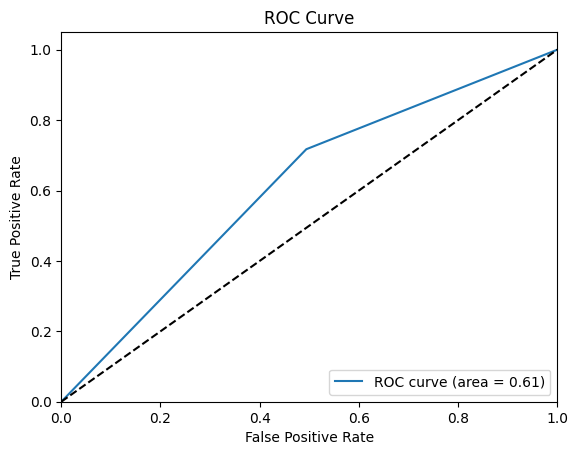

In [190]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve,roc_auc_score,auc
import matplotlib.pyplot as plt

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': [ 'l2'],
}


# Create a GridSearchCV object 
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_under_resampled_s, y_under_resampled)

# Print the best hyperparameters and best score
print("Best hyperparameters for undersample: ", grid_search.best_params_)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_s)
y_train_pred=best_model.predict(X_under_resampled_s)

# Evaluate the performance of the best model on the test set
print("after tunning incase of undersampling")
print("classification report for test after tunning ")
print(classification_report(y_test, y_pred))
print("classification report for train after tunning")
print(classification_report(y_under_resampled,y_train_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Best hyperparameters for oversample:  {'C': 1, 'penalty': 'l2'}
after tunning incase of oversampling
classification report for test after tunning 
              precision    recall  f1-score   support

           0       0.87      0.50      0.64      7040
           1       0.29      0.72      0.41      1960

    accuracy                           0.55      9000
   macro avg       0.58      0.61      0.52      9000
weighted avg       0.74      0.55      0.59      9000

classification report for train after tunning
              precision    recall  f1-score   support

           0       0.64      0.49      0.56     16324
           1       0.59      0.73      0.65     16324

    accuracy                           0.61     32648
   macro avg       0.62      0.61      0.60     32648
weighted avg       0.62      0.61      0.60     32648



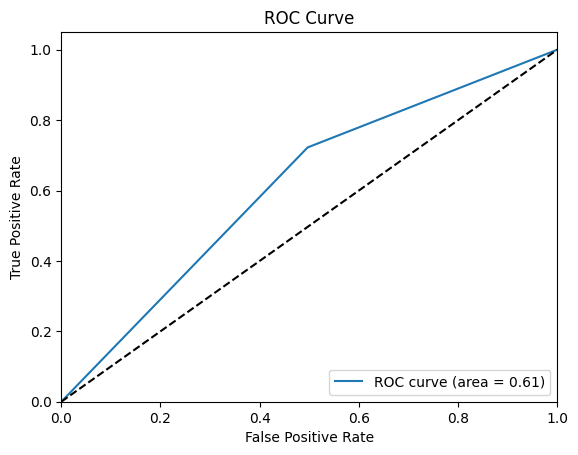

In [191]:
grid_search.fit(X_over_resampled_s, y_over_resampled)

# Print the best hyperparameters and best score
print("Best hyperparameters for oversample: ", grid_search.best_params_)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_s)
y_train_pred=best_model.predict(X_over_resampled_s)

# Evaluate the performance of the best model on the test set
print("after tunning incase of oversampling")
print("classification report for test after tunning ")
print(classification_report(y_test, y_pred))
print("classification report for train after tunning")
print(classification_report(y_over_resampled,y_train_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Best hyperparameters for smote:  {'C': 1, 'penalty': 'l2'}
after tunning incase of smote
classification report for test after tuning 
              precision    recall  f1-score   support

           0       0.87      0.50      0.64      7040
           1       0.29      0.73      0.42      1960

    accuracy                           0.55      9000
   macro avg       0.58      0.62      0.53      9000
weighted avg       0.75      0.55      0.59      9000

classification report for train after tuning
              precision    recall  f1-score   support

           0       0.66      0.49      0.57     16324
           1       0.60      0.75      0.66     16324

    accuracy                           0.62     32648
   macro avg       0.63      0.62      0.62     32648
weighted avg       0.63      0.62      0.62     32648



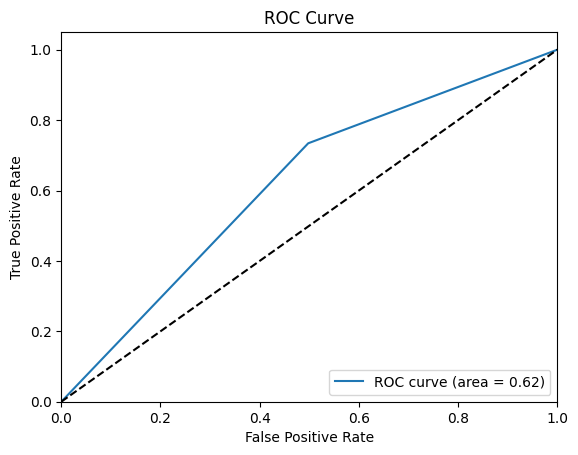

In [192]:
grid_search.fit(X_smote_resampled_s, y_smote_resampled)

# Print the best hyperparameters and best score
print("Best hyperparameters for smote: ", grid_search.best_params_)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_s)
y_train_pred=best_model.predict(X_smote_resampled_s)

# Evaluate the performance of the best model on the test set
print("after tunning incase of smote")
print("classification report for test after tuning ")
print(classification_report(y_test, y_pred))
print("classification report for train after tuning")
print(classification_report(y_smote_resampled,y_train_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Even after tunning with hyperparameters the metrics of logistic regression are not good so we built other models

## SVM LINEAR KERNEL

In [193]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01],
    'kernel': ['linear'],
    'gamma': ['auto']
}

# GridSearchCV with SMOTE oversampling
grid_smote = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_smote.fit(X_smote_resampled_s, y_smote_resampled)
best_svc_smote = grid_smote.best_estimator_

# GridSearchCV with RandomOverSampler oversampling
grid_over = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_over.fit(X_over_resampled_s, y_over_resampled)
best_svc_over = grid_over.best_estimator_

# GridSearchCV with RandomUnderSampler undersampling
grid_under = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_under.fit(X_under_resampled_s, y_under_resampled)
best_svc_under = grid_under.best_estimator_

# Evaluate the best models
y_pred_best_smote = best_svc_smote.predict(X_test_s)
y_train_smote=best_svc_smote.predict(X_smote_resampled_s)
y_pred_best_over = best_svc_over.predict(X_test_s)
y_train_over=best_svc_smote.predict(X_over_resampled_s)
y_pred_best_under = best_svc_under.predict(X_test_s)
y_train_under=best_svc_smote.predict(X_under_resampled_s)

print("Best SVM with SMOTE test (Classification Report):")
print(classification_report(y_test, y_pred_best_smote))
print("Best SVM with SMOTE  train (Classification Report):")
print(classification_report(y_smote_resampled,y_train_smote))
print("Best SVM with RandomOverSampler test (Classification Report):")
print(classification_report(y_test, y_pred_best_over))
print("Best SVM with RandomOverSampler train(Classification Report):")
print(classification_report(y_over_resampled,y_train_over))
print("Best SVM with RandomUnderSampler test (Classification Report):")
print(classification_report(y_test, y_pred_best_under))
print("Best SVM with RandomunderSampler train (Classification Report):")
print(classification_report(y_under_resampled, y_train_under))

Best SVM with SMOTE test (Classification Report):
              precision    recall  f1-score   support

           0       0.88      0.41      0.56      7040
           1       0.27      0.80      0.41      1960

    accuracy                           0.50      9000
   macro avg       0.58      0.60      0.48      9000
weighted avg       0.75      0.50      0.53      9000

Best SVM with SMOTE  train (Classification Report):
              precision    recall  f1-score   support

           0       0.68      0.40      0.51     16324
           1       0.58      0.81      0.67     16324

    accuracy                           0.61     32648
   macro avg       0.63      0.61      0.59     32648
weighted avg       0.63      0.61      0.59     32648

Best SVM with RandomOverSampler test (Classification Report):
              precision    recall  f1-score   support

           0       0.88      0.41      0.56      7040
           1       0.27      0.79      0.40      1960

    accuracy      

## SVM RBF KERNEL

In [194]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [10],
    'kernel': ['rbf'],
    'gamma': ['auto']
}

# GridSearchCV with SMOTE oversampling
grid_smote = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_smote.fit(X_smote_resampled_s, y_smote_resampled)
best_svc_smote = grid_smote.best_estimator_

# Evaluate the best models
y_pred_best_smote = best_svc_smote.predict(X_test_s)
y_train_smote=best_svc_smote.predict(X_smote_resampled_s)

print("Best SVM with SMOTE (Classification Report):")
print(classification_report(y_test, y_pred_best_smote))
print("Best SVM with SMOTE  train (Classification Report):")
print(classification_report(y_smote_resampled,y_train_smote))

Best SVM with SMOTE (Classification Report):
              precision    recall  f1-score   support

           0       0.87      0.56      0.68      7040
           1       0.31      0.70      0.43      1960

    accuracy                           0.59      9000
   macro avg       0.59      0.63      0.56      9000
weighted avg       0.75      0.59      0.63      9000

Best SVM with SMOTE  train (Classification Report):
              precision    recall  f1-score   support

           0       0.75      0.58      0.65     16324
           1       0.66      0.81      0.73     16324

    accuracy                           0.69     32648
   macro avg       0.71      0.69      0.69     32648
weighted avg       0.71      0.69      0.69     32648



The performance of svm linear kernel is 49% so tried rbf kernel which resulted just 59% which means not a good model too 

## DECISION TREE CLASSIFIER

### BEFORE TUNNING

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Decision Tree classifier with SMOTE oversampling
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_smote_resampled, y_smote_resampled)
y_pred_smote_train = dt_smote.predict(X_smote_resampled)
y_pred_smote_test = dt_smote.predict(X_test)

print("Decision Tree with SMOTE - Training Set (Classification Report):\n")
print(classification_report(y_smote_resampled, y_pred_smote_train))
print("Decision Tree with SMOTE - Test Set (Classification Report):\n")
print(classification_report(y_test, y_pred_smote_test))
print("Decision Tree with SMOTE - Test Set (Confusion Matrix):\n")
print(confusion_matrix(y_test, y_pred_smote_test))

# Decision Tree classifier with RandomOverSampler oversampling
dt_over = DecisionTreeClassifier(random_state=42)
dt_over.fit(X_over_resampled, y_over_resampled)
y_pred_over_train = dt_over.predict(X_over_resampled)
y_pred_over_test = dt_over.predict(X_test)

print("Decision Tree with RandomOverSampler - Training Set (Classification Report):\n")
print(classification_report(y_over_resampled, y_pred_over_train))
print("Decision Tree with RandomOverSampler - Test Set (Classification Report):\n")
print(classification_report(y_test, y_pred_over_test))
print("Decision Tree with RandomOverSampler - Test Set (Confusion Matrix):\n")
print(confusion_matrix(y_test, y_pred_over_test))

# Decision Tree classifier with RandomUnderSampler undersampling
dt_under = DecisionTreeClassifier(random_state=42)
dt_under.fit(X_under_resampled, y_under_resampled)
y_pred_under_train = dt_under.predict(X_under_resampled)
y_pred_under_test = dt_under.predict(X_test)

print("Decision Tree with RandomUnderSampler - Training Set (Classification Report):\n")
print(classification_report(y_under_resampled, y_pred_under_train))
print("Decision Tree with RandomUnderSampler - Test Set (Classification Report):\n")
print(classification_report(y_test, y_pred_under_test))
print("Decision Tree with RandomUnderSampler - Test Set (Confusion Matrix):\n")
print(confusion_matrix(y_test, y_pred_under_test))

Decision Tree with SMOTE - Training Set (Classification Report):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00     16324

    accuracy                           1.00     32648
   macro avg       1.00      1.00      1.00     32648
weighted avg       1.00      1.00      1.00     32648

Decision Tree with SMOTE - Test Set (Classification Report):

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      7040
           1       0.36      0.41      0.39      1960

    accuracy                           0.71      9000
   macro avg       0.60      0.60      0.60      9000
weighted avg       0.73      0.71      0.72      9000

Decision Tree with SMOTE - Test Set (Confusion Matrix):

[[5626 1414]
 [1155  805]]
Decision Tree with RandomOverSampler - Training Set (Classification Report):

              precision    recall  f1-score   support

 

The accuracy of decisiontree classifier before tunning is 72%

### AFTER TUNNING

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV with SMOTE oversampling
grid_smote = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_smote.fit(X_smote_resampled, y_smote_resampled)
best_dt_smote = grid_smote.best_estimator_

# GridSearchCV with RandomOverSampler oversampling
grid_over = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_over.fit(X_over_resampled, y_over_resampled)
best_dt_over = grid_over.best_estimator_

# GridSearchCV with RandomUnderSampler undersampling
grid_under = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_under.fit(X_under_resampled, y_under_resampled)
best_dt_under = grid_under.best_estimator_

# Make predictions on the training datasets
y_pred_best_smote_train = best_dt_smote.predict(X_smote_resampled)
y_pred_best_over_train = best_dt_over.predict(X_over_resampled)
y_pred_best_under_train = best_dt_under.predict(X_under_resampled)

# Make predictions on the test datasets
y_pred_best_smote_test = best_dt_smote.predict(X_test)
y_pred_best_over_test = best_dt_over.predict(X_test)
y_pred_best_under_test = best_dt_under.predict(X_test)

# Print classification reports for training datasets
print("Best Decision Tree with SMOTE - Training Set (Classification Report):")
print(classification_report(y_smote_resampled, y_pred_best_smote_train))
print("Best Decision Tree with RandomOverSampler - Training Set (Classification Report):")
print(classification_report(y_over_resampled, y_pred_best_over_train))
print("Best Decision Tree with RandomUnderSampler - Training Set (Classification Report):")
print(classification_report(y_under_resampled, y_pred_best_under_train))

# Print classification reports for test datasets
print("Best Decision Tree with SMOTE - Test Set (Classification Report):")
print(classification_report(y_test, y_pred_best_smote_test))
print("Best Decision Tree with RandomOverSampler - Test Set (Classification Report):")
print(classification_report(y_test, y_pred_best_over_test))
print("Best Decision Tree with RandomUnderSampler - Test Set (Classification Report):")
print(classification_report(y_test, y_pred_best_under_test))


Best Decision Tree with SMOTE - Training Set (Classification Report):
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     16324
           1       0.92      0.76      0.83     16324

    accuracy                           0.85     32648
   macro avg       0.86      0.85      0.85     32648
weighted avg       0.86      0.85      0.85     32648

Best Decision Tree with RandomOverSampler - Training Set (Classification Report):
              precision    recall  f1-score   support

           0       0.76      0.81      0.78     16324
           1       0.79      0.74      0.77     16324

    accuracy                           0.77     32648
   macro avg       0.78      0.77      0.77     32648
weighted avg       0.78      0.77      0.77     32648

Best Decision Tree with RandomUnderSampler - Training Set (Classification Report):
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      4676
  

In [197]:
print("Best hyperparameters for undersample: ", grid_smote.best_params_)

Best hyperparameters for undersample:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


### From the outputs provided:

Decision Tree with SMOTE - The accuracy is 0.81, indicating that the model correctly predicts the class labels for 81% of the samples in the test set whereas Decision Tree with RandomOverSampler and RandomUnderSamplerhas accuracy 0.71, 0.74, indicating that the model correctly predicts the class labels for 71% ,74% of the samples in the test set.

In terms of accuracy, the Decision Tree model with SMOTE oversampling has the highest accuracy among the three models which is 81% after hyperparameter tuning.

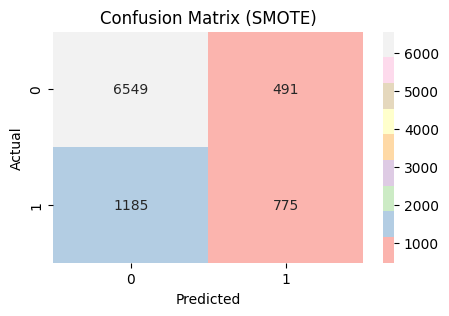

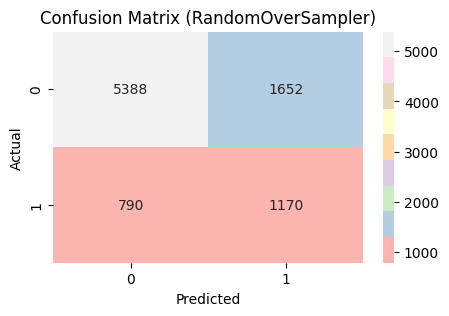

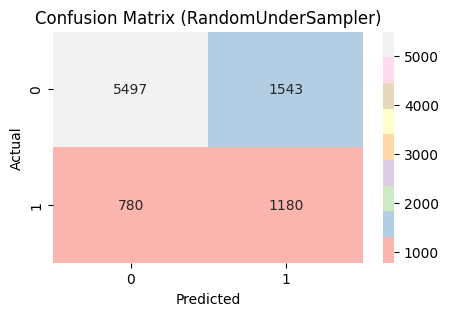

In [198]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute the confusion matrix for each model
cm_smote = confusion_matrix(y_test, y_pred_best_smote_test)
cm_over = confusion_matrix(y_test, y_pred_best_over_test)
cm_under = confusion_matrix(y_test, y_pred_best_under_test)

# Define the color palette
color_palette = "Pastel1"

# Plot the confusion matrix for SMOTE
plt.figure(figsize=(5, 3))
sns.heatmap(cm_smote, annot=True, fmt="d", cmap=color_palette)
plt.title("Confusion Matrix (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the confusion matrix for RandomOverSampler
plt.figure(figsize=(5, 3))
sns.heatmap(cm_over, annot=True, fmt="d", cmap=color_palette)
plt.title("Confusion Matrix (RandomOverSampler)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the confusion matrix for RandomUnderSampler
plt.figure(figsize=(5, 3))
sns.heatmap(cm_under, annot=True, fmt="d", cmap=color_palette)
plt.title("Confusion Matrix (RandomUnderSampler)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ADABOOST CLASSIFIER

With the best hyperparameters choosed by gridsearchcv when tunned decision tree classifier as a base estimator we are going to build adaboost classifier 

### Before tunning

In [199]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# AdaBoost classifier with SMOTE oversampling
adaboost_smote = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7, min_samples_leaf= 2, min_samples_split=5),n_estimators=500,random_state=0)
adaboost_smote.fit(X_smote_resampled, y_smote_resampled)
y_pred_adaboost_smote_train = adaboost_smote.predict(X_smote_resampled)
y_pred_adaboost_smote_test = adaboost_smote.predict(X_test)

print("AdaBoost with SMOTE - Training Set (Classification Report):\n")
print(classification_report(y_smote_resampled, y_pred_adaboost_smote_train))
print("AdaBoost with SMOTE - Test Set (Classification Report):\n")
print(classification_report(y_test, y_pred_adaboost_smote_test))

# AdaBoost classifier with RandomOverSampler oversampling
adaboost_over = AdaBoostClassifier(random_state=42)
adaboost_over.fit(X_over_resampled, y_over_resampled)
y_pred_adaboost_over_train = adaboost_over.predict(X_over_resampled)
y_pred_adaboost_over_test = adaboost_over.predict(X_test)

print("AdaBoost with RandomOverSampler - Training Set (Classification Report):\n")
print(classification_report(y_over_resampled, y_pred_adaboost_over_train))
print("AdaBoost with RandomOverSampler - Test Set (Classification Report):\n")
print(classification_report(y_test, y_pred_adaboost_over_test))

# AdaBoost classifier with RandomUnderSampler undersampling
adaboost_under = AdaBoostClassifier(random_state=42)
adaboost_under.fit(X_under_resampled, y_under_resampled)
y_pred_adaboost_under_train = adaboost_under.predict(X_under_resampled)
y_pred_adaboost_under_test = adaboost_under.predict(X_test)

print("AdaBoost with RandomUnderSampler - Training Set (Classification Report):\n")
print(classification_report(y_under_resampled, y_pred_adaboost_under_train))
print("AdaBoost with RandomUnderSampler - Test Set (Classification Report):\n")
print(classification_report(y_test, y_pred_adaboost_under_test))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost with SMOTE - Training Set (Classification Report):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00     16324

    accuracy                           1.00     32648
   macro avg       1.00      1.00      1.00     32648
weighted avg       1.00      1.00      1.00     32648

AdaBoost with SMOTE - Test Set (Classification Report):

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      7040
           1       0.50      0.40      0.45      1960

    accuracy                           0.78      9000
   macro avg       0.67      0.65      0.66      9000
weighted avg       0.77      0.78      0.77      9000

AdaBoost with RandomOverSampler - Training Set (Classification Report):

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     16324
           1       0.76      0.62      0.69   

with number of estimators as 500 the accuracy is 77% so we employed gridsearch cv to choose best estimators

### After tunning

In [200]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# AdaBoost classifier with SMOTE oversampling and hyperparameter tuning
adaboost_smote = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7, min_samples_leaf= 2, min_samples_split=5),random_state=0)
grid_smote = GridSearchCV(adaboost_smote, param_grid, cv=5)
grid_smote.fit(X_smote_resampled, y_smote_resampled)
best_adaboost_smote = grid_smote.best_estimator_

# AdaBoost classifier with RandomOverSampler oversampling and hyperparameter tuning
adaboost_over = AdaBoostClassifier(random_state=42)
grid_over = GridSearchCV(adaboost_over, param_grid, cv=5)
grid_over.fit(X_over_resampled, y_over_resampled)
best_adaboost_over = grid_over.best_estimator_

# AdaBoost classifier with RandomUnderSampler undersampling and hyperparameter tuning
adaboost_under = AdaBoostClassifier(random_state=42)
grid_under = GridSearchCV(adaboost_under, param_grid, cv=5)
grid_under.fit(X_under_resampled, y_under_resampled)
best_adaboost_under = grid_under.best_estimator_

# Make predictions on the training datasets
y_pred_best_smote_train = best_adaboost_smote.predict(X_smote_resampled)
y_pred_best_over_train = best_adaboost_over.predict(X_over_resampled)
y_pred_best_under_train = best_adaboost_under.predict(X_under_resampled)

# Make predictions on the test datasets
y_pred_best_smote_test = best_adaboost_smote.predict(X_test)
y_pred_best_over_test = best_adaboost_over.predict(X_test)
y_pred_best_under_test = best_adaboost_under.predict(X_test)

# Print classification reports for training datasets
print("Best AdaBoost with SMOTE - Training Set (Classification Report):")
print(classification_report(y_smote_resampled, y_pred_best_smote_train))
print("Best AdaBoost with RandomOverSampler - Training Set (Classification Report):")
print(classification_report(y_over_resampled, y_pred_best_over_train))
print("Best AdaBoost with RandomUnderSampler - Training Set (Classification Report):")
print(classification_report(y_under_resampled, y_pred_best_under_train))

# Print classification reports for test datasets
print("Best AdaBoost with SMOTE - Test Set (Classification Report):")
print(classification_report(y_test, y_pred_best_smote_test))
print("Best AdaBoost with RandomOverSampler - Test Set (Classification Report):")
print(classification_report(y_test, y_pred_best_over_test))
print("Best AdaBoost with RandomUnderSampler - Test Set (Classification Report):")
print(classification_report(y_test, y_pred_best_under_test))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best AdaBoost with SMOTE - Training Set (Classification Report):
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     16324
           1       0.98      0.88      0.93     16324

    accuracy                           0.93     32648
   macro avg       0.93      0.93      0.93     32648
weighted avg       0.93      0.93      0.93     32648

Best AdaBoost with RandomOverSampler - Training Set (Classification Report):
              precision    recall  f1-score   support

           0       0.69      0.81      0.74     16324
           1       0.77      0.64      0.70     16324

    accuracy                           0.72     32648
   macro avg       0.73      0.72      0.72     32648
weighted avg       0.73      0.72      0.72     32648

Best AdaBoost with RandomUnderSampler - Training Set (Classification Report):
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      4676
           1     

In [201]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# AdaBoost classifier with SMOTE oversampling and hyperparameter tuning
adaboost_smote = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
grid_smote = GridSearchCV(adaboost_smote, param_grid, cv=5)
grid_smote.fit(X_smote_resampled, y_smote_resampled)
best_adaboost_smote = grid_smote.best_estimator_

# AdaBoost classifier with RandomOverSampler oversampling and hyperparameter tuning
adaboost_over = AdaBoostClassifier(random_state=42)
grid_over = GridSearchCV(adaboost_over, param_grid, cv=5)
grid_over.fit(X_over_resampled, y_over_resampled)
best_adaboost_over = grid_over.best_estimator_

# AdaBoost classifier with RandomUnderSampler undersampling and hyperparameter tuning
adaboost_under = AdaBoostClassifier(random_state=42)
grid_under = GridSearchCV(adaboost_under, param_grid, cv=5)
grid_under.fit(X_under_resampled, y_under_resampled)
best_adaboost_under = grid_under.best_estimator_

# Make predictions on the training datasets
y_pred_best_smote_train = best_adaboost_smote.predict(X_smote_resampled)
y_pred_best_over_train = best_adaboost_over.predict(X_over_resampled)
y_pred_best_under_train = best_adaboost_under.predict(X_under_resampled)

# Make predictions on the test datasets
y_pred_best_smote_test = best_adaboost_smote.predict(X_test)
y_pred_best_over_test = best_adaboost_over.predict(X_test)
y_pred_best_under_test = best_adaboost_under.predict(X_test)

# Print classification reports for training datasets
print("Best AdaBoost with SMOTE - Training Set (Classification Report):")
print(classification_report(y_smote_resampled, y_pred_best_smote_train))
print("Best AdaBoost with RandomOverSampler - Training Set (Classification Report):")
print(classification_report(y_over_resampled, y_pred_best_over_train))
print("Best AdaBoost with RandomUnderSampler - Training Set (Classification Report):")
print(classification_report(y_under_resampled, y_pred_best_under_train))

# Print classification reports for test datasets
print("Best AdaBoost with SMOTE - Test Set (Classification Report):")
print(classification_report(y_test, y_pred_best_smote_test))
print("Best AdaBoost with RandomOverSampler - Test Set (Classification Report):")
print(classification_report(y_test, y_pred_best_over_test))
print("Best AdaBoost with RandomUnderSampler - Test Set (Classification Report):")
print(classification_report(y_test, y_pred_best_under_test))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best AdaBoost with SMOTE - Training Set (Classification Report):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00     16324

    accuracy                           1.00     32648
   macro avg       1.00      1.00      1.00     32648
weighted avg       1.00      1.00      1.00     32648

Best AdaBoost with RandomOverSampler - Training Set (Classification Report):
              precision    recall  f1-score   support

           0       0.69      0.81      0.74     16324
           1       0.77      0.64      0.70     16324

    accuracy                           0.72     32648
   macro avg       0.73      0.72      0.72     32648
weighted avg       0.73      0.72      0.72     32648

Best AdaBoost with RandomUnderSampler - Training Set (Classification Report):
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      4676
           1     

Adaboost classifier with SMOTE - The accuracy is 0.82, indicating that the model correctly predicts the class labels for 82% of the samples in the test set whereas Adaboost classifier with RandomOverSampler and RandomUnderSampler has accuracy 0.75, 0.76, indicating that the model correctly predicts the class labels for 75% ,76% of the samples in the test set. In terms of accuracy, the Adaboost classifier model with SMOTE oversampling has the highest accuracy among the three models which is 82% after hyperparameter tuning.

## KNN

### Smote

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_smote_resampled, y_smote_resampled)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
# Finding the best k value with the highest accuracy score
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print("Best k value:", best_k)
# Train the KNN model on the training data
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_smote_resampled, y_smote_resampled)

# Predict class labels for both the training and testing data using the KNN model
y_train_pred = knn.predict(X_smote_resampled)
y_test_pred = knn.predict(X_test)

# Calculate the accuracy scores for both the training and testing data
train_accuracy = accuracy_score(y_smote_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print("Train Accuracy: {:.2f}%".format(train_accuracy*100))
print("Test Accuracy: {:.2f}%".format(test_accuracy*100))

# Print the classification reports for both the training and testing data
print("Smote Train Classification Report:")
print(classification_report(y_smote_resampled, y_train_pred))

print("Smote Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Best k value: 2
Train Accuracy: 97.08%
Test Accuracy: 69.39%
Smote Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16324
           1       1.00      0.94      0.97     16324

    accuracy                           0.97     32648
   macro avg       0.97      0.97      0.97     32648
weighted avg       0.97      0.97      0.97     32648

Smote Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7040
           1       0.30      0.30      0.30      1960

    accuracy                           0.69      9000
   macro avg       0.55      0.55      0.55      9000
weighted avg       0.69      0.69      0.69      9000



### Oversampling

In [203]:

# Finding the best k value
k_values = range(1, 21)
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_over_resampled, y_over_resampled)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print("Best k value:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_over_resampled, y_over_resampled)

# Predicting class labels for both the training and testing data using the KNN model
y_train_pred = knn.predict(X_over_resampled)
y_test_pred = knn.predict(X_test)
# Calculating the accuracy scores for both the training and testing data
train_accuracy = accuracy_score(y_over_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
# accuracy scores
print("Train Accuracy: {:.2f}%".format(train_accuracy*100))
print("Test Accuracy: {:.2f}%".format(test_accuracy*100))
#classification reports for both the training and testing data
print("Oversampling Train Classification Report:")
print(classification_report(y_over_resampled, y_train_pred))
print("Oversampling Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Best k value: 2
Train Accuracy: 99.11%
Test Accuracy: 69.41%
Oversampling Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16324
           1       1.00      0.98      0.99     16324

    accuracy                           0.99     32648
   macro avg       0.99      0.99      0.99     32648
weighted avg       0.99      0.99      0.99     32648

Oversampling Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      7040
           1       0.29      0.27      0.28      1960

    accuracy                           0.69      9000
   macro avg       0.54      0.54      0.54      9000
weighted avg       0.69      0.69      0.69      9000



### Undersampling

In [204]:

# Finding the best k value
k_values = range(1, 21)
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_under_resampled, y_under_resampled)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print("Best k value:", best_k)


knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_under_resampled, y_under_resampled)

# Predict class labels for both the training and testing data using the KNN model
y_train_pred = knn.predict(X_under_resampled)
y_test_pred = knn.predict(X_test)

# Calculate the accuracy scores for both the training and testing data
train_accuracy = accuracy_score(y_under_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print("Train Accuracy: {:.2f}%".format(train_accuracy*100))
print("Test Accuracy: {:.2f}%".format(test_accuracy*100))

# Print the classification reports for both the training and testing data
print(" Undersampling Train Classification Report:")
print(classification_report(y_under_resampled, y_train_pred))

print("Underdsampling Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Best k value: 2
Train Accuracy: 77.58%
Test Accuracy: 67.82%
 Undersampling Train Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      4676
           1       1.00      0.55      0.71      4676

    accuracy                           0.78      9352
   macro avg       0.85      0.78      0.76      9352
weighted avg       0.85      0.78      0.76      9352

Underdsampling Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      7040
           1       0.29      0.32      0.30      1960

    accuracy                           0.68      9000
   macro avg       0.55      0.55      0.55      9000
weighted avg       0.69      0.68      0.68      9000



The accuracy of KNN clasifier is 69% with SMOTE

### After tunning

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': [3, 5], 
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_smote_resampled, y_smote_resampled)
y_pred=grid_search.predict(X_test)
y_train_pred=grid_search.predict(X_smote_resampled)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
print("Train Classification Report:")
print(classification_report(y_smote_resampled, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy score:  0.8009683314189937
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00     16324

    accuracy                           1.00     32648
   macro avg       1.00      1.00      1.00     32648
weighted avg       1.00      1.00      1.00     32648

Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.67      0.74      7040
           1       0.28      0.46      0.35      1960

    accuracy                           0.62      9000
   macro avg       0.55      0.57      0.54      9000
weighted avg       0.70      0.62      0.65      9000



After tuning the KNN classifier, we got the best hyperparameters as metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance' and the accuracy of 80

## RANDOM FOREST CLASSIFIER

Feature ranking:
 Reative feature importance [4.22499581e-02 3.90619827e-02 4.25198651e-02 3.56153507e-02
 3.40189424e-02 3.38629447e-02 3.28236659e-02 3.18490454e-02
 3.69258492e-02 3.57618841e-02 3.39775271e-02 3.29911026e-02
 3.07886933e-02 3.20334762e-02 2.04782514e-02 1.68417071e-02
 1.45150283e-02 3.26212671e-03 2.96123904e-02 2.44873579e-02
 3.10340881e-03 2.99455396e-02 2.35039262e-02 1.01737066e-01
 1.90743616e-02 1.09585494e-02 6.06709582e-04 1.57610036e-04
 8.55400633e-05 5.99461571e-05 1.58067369e-05 3.60291426e-05
 5.82117627e-02 1.40334173e-04 8.78137664e-03 9.54374989e-04
 3.55040791e-04 1.12982267e-04 1.30313890e-05 5.77259822e-05
 1.93871270e-05 3.68710836e-02 1.58943393e-05 6.34946986e-03
 6.99606435e-04 2.60521326e-04 8.77866869e-05 5.92252939e-05
 4.34389564e-05 6.64619196e-07 2.93429448e-02 1.09212723e-05
 5.64222323e-03 4.65448385e-04 1.41850256e-04 1.68534615e-04
 5.14246440e-05 3.71391094e-05 7.92044907e-06 2.41003252e-02
 3.64273480e-03 4.88655737e-04 2.6472984

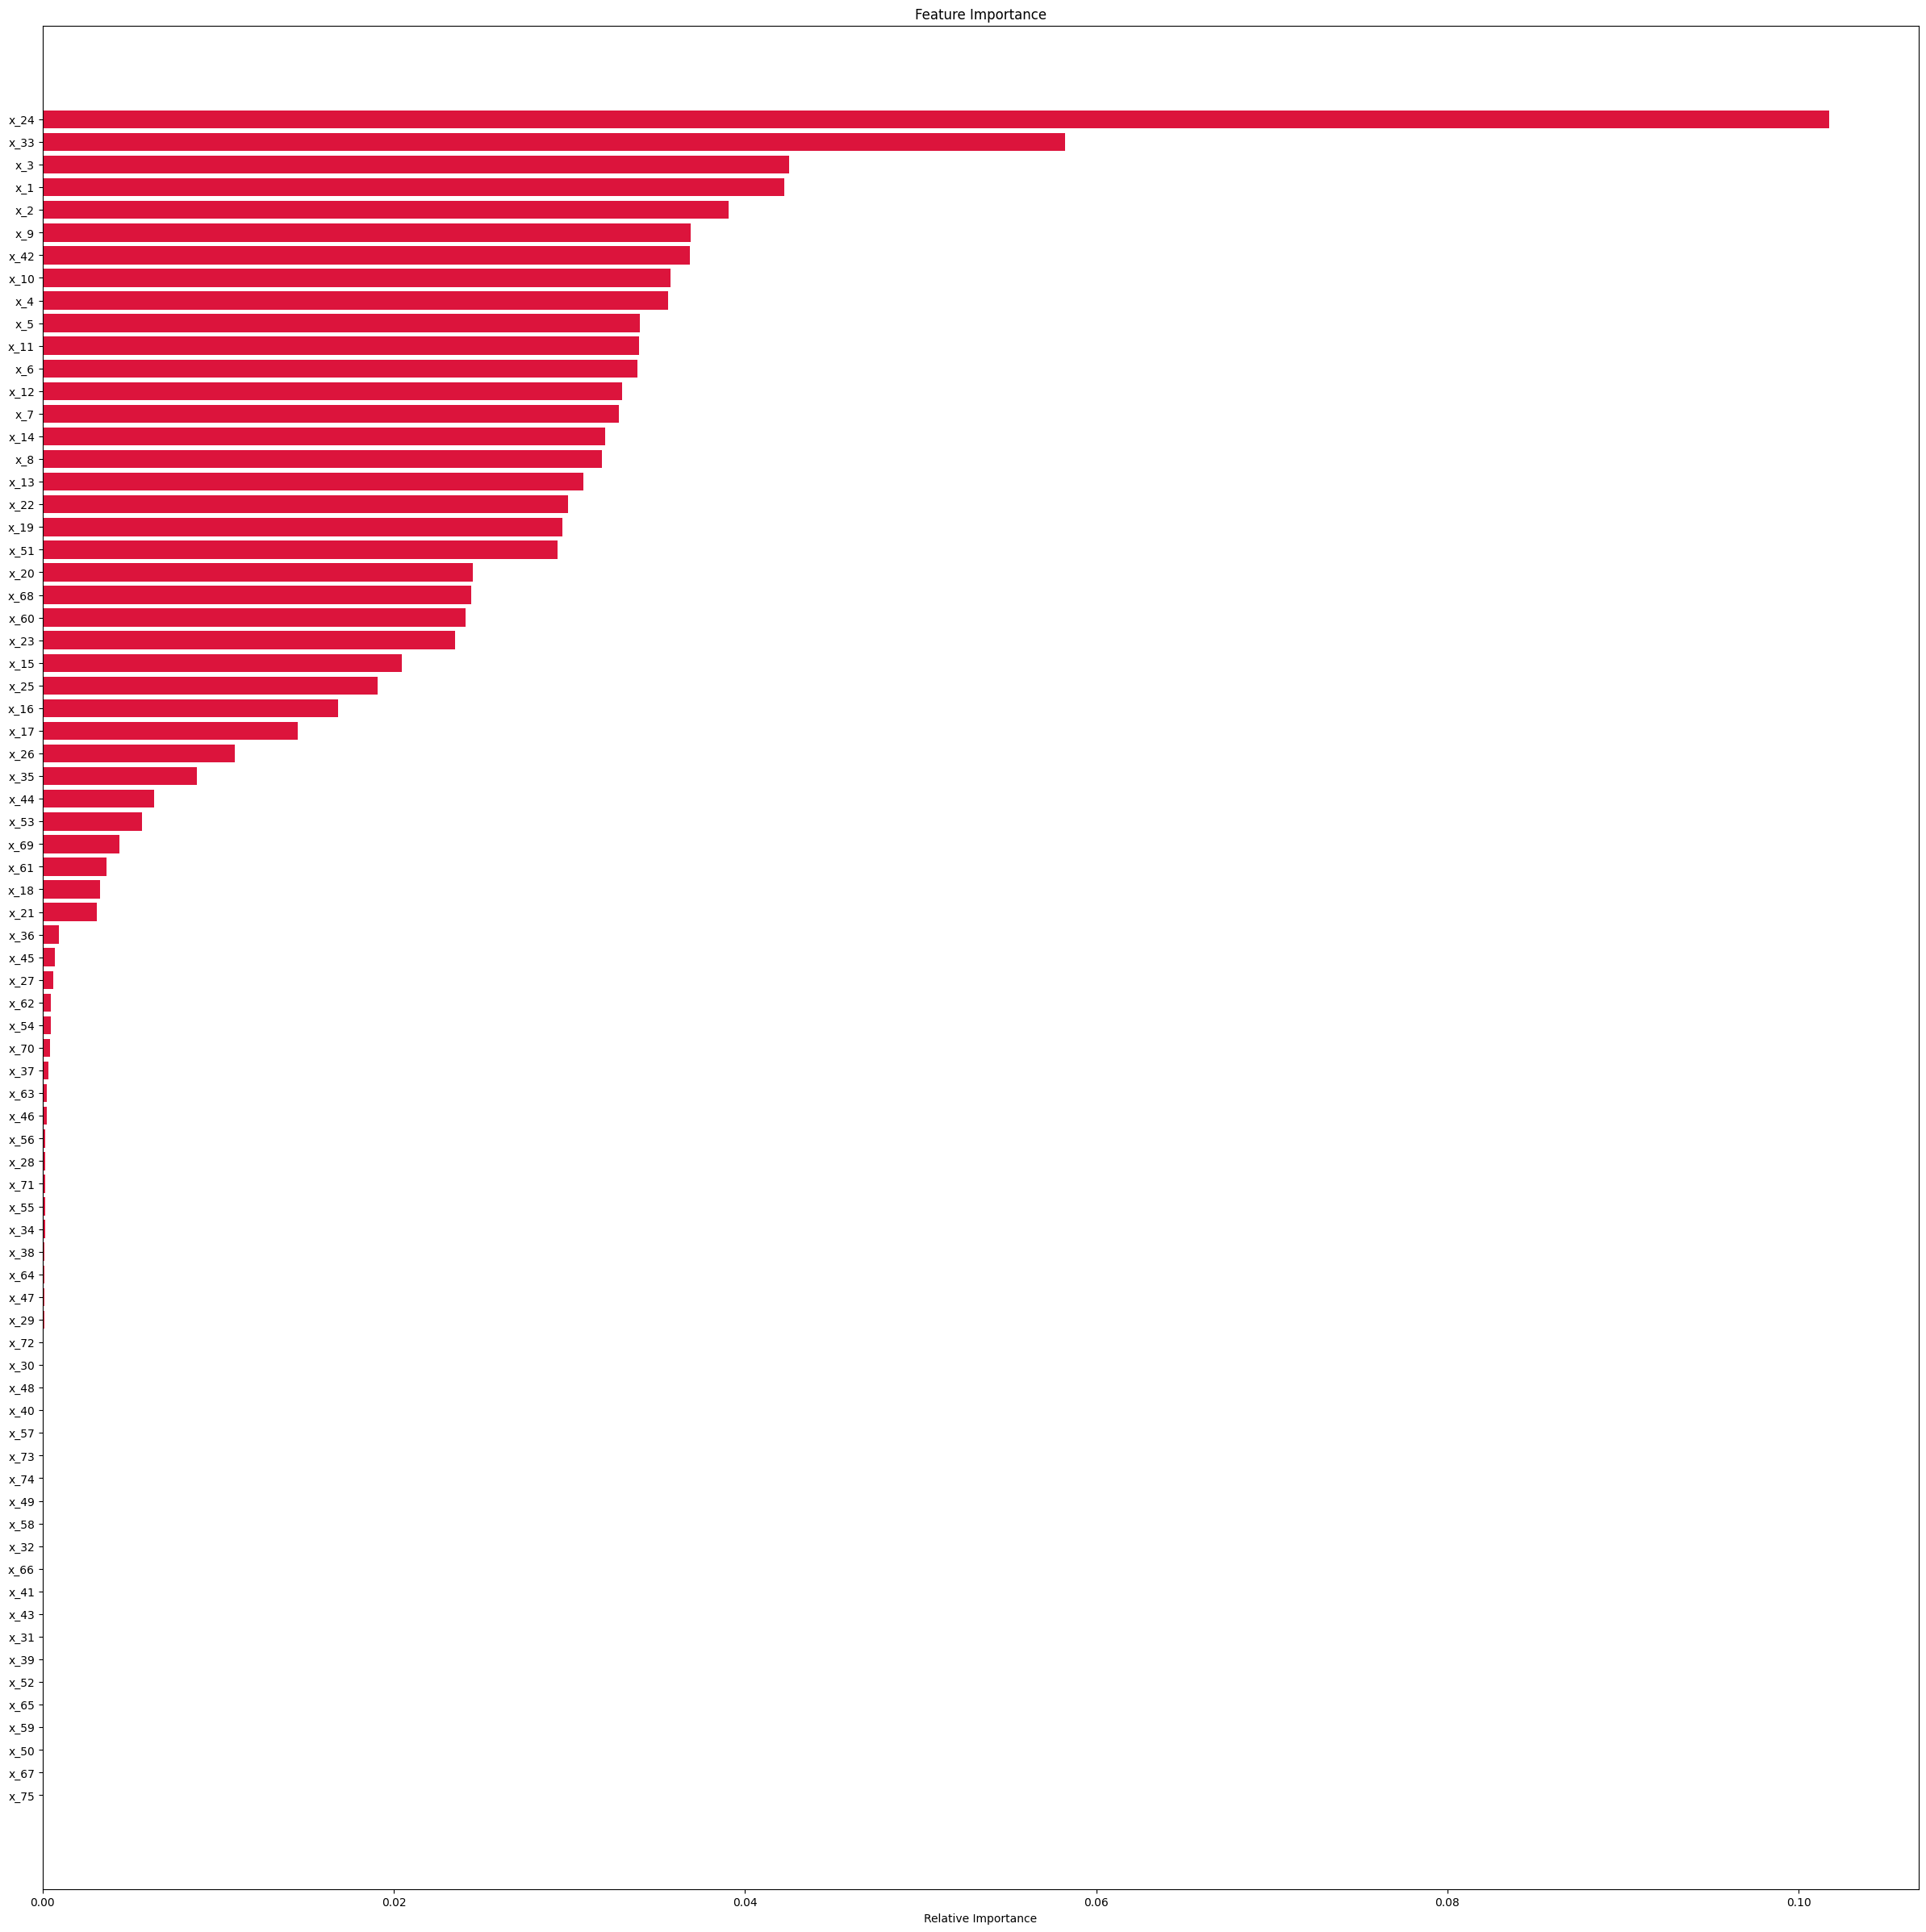

Accuracy: 0.807
Confusion Matrix:
 [[6450  590]
 [1147  813]]


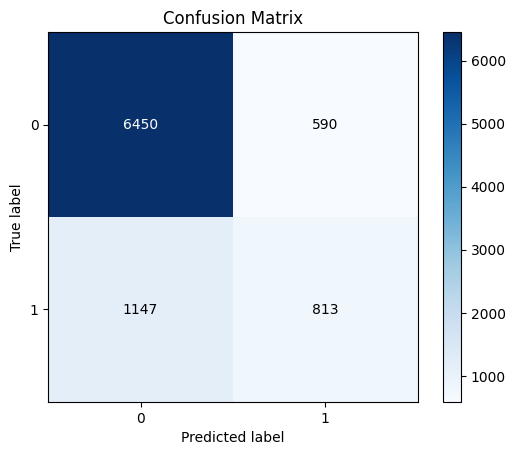

SMOTE Test Classification Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      7040
           1       0.58      0.41      0.48      1960

    accuracy                           0.81      9000
   macro avg       0.71      0.67      0.68      9000
weighted avg       0.79      0.81      0.79      9000

SMOTE Train Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00     16324

    accuracy                           1.00     32648
   macro avg       1.00      1.00      1.00     32648
weighted avg       1.00      1.00      1.00     32648



In [206]:
# Train a Random Forest Classifier on the SMOTE oversampled training set
import matplotlib.pyplot as plt

rfc_smote = RandomForestClassifier()
rfc_smote.fit(X_smote_resampled, y_smote_resampled)

# Get feature importances
importances = rfc_smote.feature_importances_


# Print feature ranking
print("Feature ranking:")
print(" Reative feature importance", importances)
sorted_idx = np.argsort(importances)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(30, 30))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, importances[sorted_idx], color='crimson', align="center")
plt.yticks(pos, np.array(['x_%d' %(i+1) for i in range(200)])[sorted_idx])
plt.show()


# Evaluate the performance of the model on the testing set
y_pred_smote = rfc_smote.predict(X_test)
# Predict on the SMOTE oversampled training set
y_pred_train_smote = rfc_smote.predict(X_smote_resampled)



# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_smote)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred_smote)
print('Confusion Matrix:\n', cm)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_smote)
pt.show()

print("SMOTE Test Classification Report")
print(classification_report( y_test, y_pred_smote))
# Print the classification report for the SMOTE oversampled training set
print("SMOTE Train Classification Report")
print(classification_report( y_smote_resampled, y_pred_train_smote))




In [207]:
print(df_final.iloc[:,24])

0        0
1        1
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    1
Name: PAY_1_0, Length: 30000, dtype: uint8


### WITH OVERSAMPLING

Feature ranking:
1. LIMIT_BAL (0.062371)
2. AGE (0.061496)
3. BILL_AMT1 (0.060441)
4. BILL_AMT2 (0.054035)
5. PAY_AMT1 (0.052736)
6. BILL_AMT3 (0.051717)
7. PAY_AMT2 (0.051581)
8. BILL_AMT4 (0.050390)
9. BILL_AMT6 (0.049529)
10. BILL_AMT5 (0.049490)
11. PAY_AMT3 (0.047949)
12. PAY_AMT6 (0.046090)
13. PAY_1_0 (0.045374)
14. PAY_AMT4 (0.044516)
15. PAY_AMT5 (0.043762)
16. PAY_1_2 (0.038564)
17. PAY_2_0 (0.024440)
18. PAY_2_2 (0.016667)
19. PAY_3_0 (0.015383)
20. PAY_3_2 (0.012868)
21. PAY_5_0 (0.011740)
22. PAY_4_0 (0.009121)
23. EDUCATION_2 (0.009029)
24. PAY_4_2 (0.008405)
25. SEX_1 (0.008371)
26. EDUCATION_1 (0.008330)
27. MARRIAGE_1 (0.008201)
28. SEX_2 (0.008150)
29. MARRIAGE_2 (0.007977)
30. EDUCATION_3 (0.006984)
31. PAY_6_2 (0.006524)
32. PAY_6_0 (0.006305)
33. PAY_1_1 (0.006283)
34. PAY_5_2 (0.004245)
35. EDUCATION_4 (0.002173)
36. MARRIAGE_3 (0.001664)
37. PAY_2_3 (0.001168)
38. PAY_1_3 (0.001134)
39. PAY_6_3 (0.000697)
40. PAY_5_3 (0.000575)
41. PAY_3_3 (0.000521)
42. PAY_4_3 

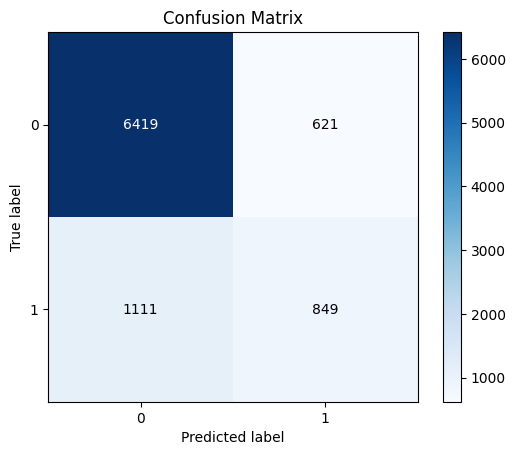

RandomOversampled Test Classification Report               precision    recall  f1-score   support

           0       0.85      0.91      0.88      7040
           1       0.58      0.43      0.50      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.67      0.69      9000
weighted avg       0.79      0.81      0.80      9000

RandomOversampled Train Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00     16324

    accuracy                           1.00     32648
   macro avg       1.00      1.00      1.00     32648
weighted avg       1.00      1.00      1.00     32648



In [208]:
# Train a Random Forest Classifier on the RandomOversampled training set
rfc_over = RandomForestClassifier()
rfc_over.fit(X_over_resampled, y_over_resampled)

# Evaluate the performance of the model on the testing set
y_pred_over = rfc_over.predict(X_test)

# Predict on the Random oversampled training set
y_pred_train_over = rfc_smote.predict(X_over_resampled)

# Get feature importances
importances = rfc_over.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")

for f in range(X_over_resampled.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_over_resampled.columns[indices[f]], importances[indices[f]]))

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_over)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred_over)
print('Confusion Matrix:\n', cm)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_over)
pt.show()


print("RandomOversampled Test Classification Report", classification_report( y_test, y_pred_over))
print("RandomOversampled Train Classification Report", classification_report( y_over_resampled, y_pred_train_over))


### WITH UNDERSAMPLING

Feature ranking:
1. LIMIT_BAL (0.061156)
2. BILL_AMT1 (0.058959)
3. AGE (0.058944)
4. BILL_AMT2 (0.052460)
5. PAY_AMT1 (0.050523)
6. BILL_AMT4 (0.050342)
7. PAY_1_0 (0.050077)
8. PAY_AMT2 (0.049947)
9. BILL_AMT3 (0.049620)
10. PAY_AMT3 (0.049324)
11. BILL_AMT6 (0.049019)
12. BILL_AMT5 (0.048774)
13. PAY_AMT6 (0.046574)
14. PAY_AMT4 (0.045545)
15. PAY_AMT5 (0.045014)
16. PAY_1_2 (0.037292)
17. PAY_2_0 (0.027538)
18. PAY_3_0 (0.016297)
19. PAY_2_2 (0.015903)
20. PAY_4_0 (0.011268)
21. PAY_3_2 (0.011010)
22. EDUCATION_2 (0.009604)
23. PAY_6_0 (0.009491)
24. EDUCATION_1 (0.008811)
25. PAY_4_2 (0.008783)
26. SEX_1 (0.008642)
27. SEX_2 (0.008629)
28. MARRIAGE_1 (0.008559)
29. MARRIAGE_2 (0.008295)
30. EDUCATION_3 (0.007538)
31. PAY_5_0 (0.007137)
32. PAY_1_1 (0.007044)
33. PAY_6_2 (0.006986)
34. PAY_5_2 (0.003651)
35. EDUCATION_4 (0.002754)
36. MARRIAGE_3 (0.001474)
37. PAY_2_3 (0.001018)
38. PAY_1_3 (0.000974)
39. PAY_6_3 (0.000600)
40. PAY_5_3 (0.000523)
41. PAY_4_3 (0.000520)
42. PAY_3_3 

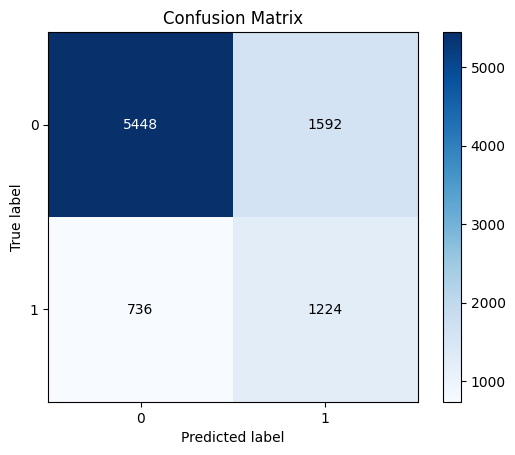

UnderSampled Test Classification Report               precision    recall  f1-score   support

           0       0.88      0.77      0.82      7040
           1       0.43      0.62      0.51      1960

    accuracy                           0.74      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.78      0.74      0.76      9000

UnderSampled Train Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4676
           1       1.00      1.00      1.00      4676

    accuracy                           1.00      9352
   macro avg       1.00      1.00      1.00      9352
weighted avg       1.00      1.00      1.00      9352



In [209]:
# Train a Random Forest Classifier on the UnderSampled training set
rfc_under = RandomForestClassifier()
rfc_under.fit(X_under_resampled, y_under_resampled)

# Evaluate the performance of the model on the testing set
y_pred_under = rfc_under.predict(X_test)

y_pred_train_under = rfc_smote.predict(X_under_resampled)


# Get feature importances
importances = rfc_under.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")

for f in range(X_under_resampled.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_under_resampled.columns[indices[f]], importances[indices[f]]))

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_under)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred_under)
print('Confusion Matrix:\n', cm)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_under)
pt.show()


print("UnderSampled Test Classification Report", classification_report( y_test, y_pred_under))
print("UnderSampled Train Classification Report", classification_report(y_under_resampled, y_pred_train_under))


for the random forest classifier we got 81% accuracy

### After Tuning

In [210]:
from sklearn.model_selection import GridSearchCV

# Create a parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rfc = RandomForestClassifier()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_smote_resampled, y_smote_resampled)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
y_train_pred = grid_search.best_estimator_.predict(X_smote_resampled)

# Evaluate the performance of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

print("Tunned random forest classifier test report")
print(classification_report(y_test, y_pred))
print("Tunned random forest classifier train report")
print(classification_report(y_smote_resampled, y_train_pred))

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8051111111111111
Confusion Matrix:
 [[6345  695]
 [1059  901]]
Tunned random forest classifier test report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7040
           1       0.56      0.46      0.51      1960

    accuracy                           0.81      9000
   macro avg       0.71      0.68      0.69      9000
weighted avg       0.79      0.81      0.80      9000

Tunned random forest classifier train report
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     16324
           1       0.92      0.82      0.87     16324

    accuracy                           0.87     32648
   macro avg       0.88      0.87      0.87     32648
weighted avg       0.88      0.87      0.87     32648



After Hyperparameter tuning we got the best parameters to be max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100 with accuracy of 80.51 which is a decent accuracy compared to previous models

## GRADIENT BOOSTING

### WITH SMOTE

In [211]:
# Instantiate the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Fit the classifier to the SMOTE resampled data
gb_clf.fit(X_smote_resampled, y_smote_resampled)

# Make predictions on the test data
y_pred = gb_clf.predict(X_test)

# Print classification report
print("classificiation report for gradient boosting test dataset")
print(classification_report(y_test, y_pred))

y_train_pred=gb_clf.predict(X_smote_resampled)
# Print classification report
print("classification report for gradient boosting train dataset")
print(classification_report(y_smote_resampled, y_train_pred))

classificiation report for gradient boosting test dataset
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.65      0.38      0.48      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

classification report for gradient boosting train dataset
              precision    recall  f1-score   support

           0       0.83      0.95      0.88     16324
           1       0.94      0.81      0.87     16324

    accuracy                           0.88     32648
   macro avg       0.88      0.88      0.88     32648
weighted avg       0.88      0.88      0.88     32648



For the gradient boosting test dataset, the model achieved an accuracy of 0.82. The precision, recall, and f1-score for class 0 are 0.84, 0.95, and 0.89 respectively, and for class 1, they are 0.65, 0.36, and 0.47 respectively. For the train dataset, the model achieved an accuracy of 0.88, with precision, recall, and f1-score of 0.83, 0.95, and 0.88 for class 0, and 0.94, 0.80, and 0.87 for class 1, respectively.

### WITH OVERSAMPLING

In [212]:

# Fit the classifier to the SMOTE resampled data
gb_clf.fit(X_over_resampled, y_over_resampled)

# Make predictions on the test data
y_pred = gb_clf.predict(X_test)

# Print classification report
print("classificiation report for gradient boosting test dataset")
print(classification_report(y_test, y_pred))

y_train_pred=gb_clf.predict(X_over_resampled)
# Print classification report
print("classification report for gradient boosting train dataset")
print(classification_report(y_over_resampled, y_train_pred))

classificiation report for gradient boosting test dataset
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      7040
           1       0.45      0.63      0.53      1960

    accuracy                           0.76      9000
   macro avg       0.67      0.71      0.68      9000
weighted avg       0.79      0.76      0.77      9000

classification report for gradient boosting train dataset
              precision    recall  f1-score   support

           0       0.70      0.80      0.75     16324
           1       0.77      0.66      0.71     16324

    accuracy                           0.73     32648
   macro avg       0.74      0.73      0.73     32648
weighted avg       0.74      0.73      0.73     32648



### WITH UNDERSAMPLING

In [213]:

# Fit the classifier to the SMOTE resampled data
gb_clf.fit(X_under_resampled, y_under_resampled)

# Make predictions on the test data
y_pred = gb_clf.predict(X_test)

# Print classification report
print("classificiation report for gradient boosting test dataset")
print(classification_report(y_test, y_pred))

y_train_pred=gb_clf.predict(X_under_resampled)
# Print classification report
print("classification report for gradient boosting train dataset")
print(classification_report(y_under_resampled, y_train_pred))

classificiation report for gradient boosting test dataset
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      7040
           1       0.44      0.63      0.52      1960

    accuracy                           0.75      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.79      0.75      0.76      9000

classification report for gradient boosting train dataset
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      4676
           1       0.78      0.67      0.72      4676

    accuracy                           0.74      9352
   macro avg       0.74      0.74      0.74      9352
weighted avg       0.74      0.74      0.74      9352



### AFTER TUNING

In [214]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100,200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5,7],
}

# Create a GradientBoostingClassifier object
gbc = GradientBoostingClassifier(random_state=42)

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_smote_resampled, y_smote_resampled)

# Print the best hyperparameters and best score
print("Best hyperparameters: ", grid_search.best_params_)


# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_train_pred=best_model.predict(X_smote_resampled)

# Evaluate the performance of the best model on the test set
print("Classification Report after tunnning graident boosting for test datset: ")
print(classification_report(y_test, y_pred))
print("Classification Report after tunnning graident boosting for train datset: ")
print(classification_report(y_smote_resampled, y_train_pred))

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Classification Report after tunnning graident boosting for test datset: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.65      0.38      0.48      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

Classification Report after tunnning graident boosting for test datset: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.88     16324
           1       0.94      0.81      0.87     16324

    accuracy                           0.88     32648
   macro avg       0.88      0.88      0.88     32648
weighted avg       0.88      0.88      0.88     32648



These classification reports provide evaluation metrics such as precision, recall, and F1-score for each class, as well as overall accuracy, macro average, and weighted average values.

Before tuning, the model achieved an accuracy of 0.82 on the test dataset. 
The precision, recall, and F1-scores for each class also improved after tuning, resulting in better overall performance

## XGBOOST

### WITH SMOTE

In [215]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Run the XGBoost model
xgb_model = xgb.XGBClassifier(
    booster='gbtree',  # Use tree-based model
    n_estimators=500,  # Number of trees
    max_depth=7,       # Maximum tree depth
    learning_rate=0.1,  # Learning rate
    use_label_encoder=False  # Set to False if you want to avoid warnings about label encoding
)

xgb_model.fit(X_smote_resampled, y_smote_resampled)

# Predictions
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_smote_resampled)

# Confusion matrices
cm_test = confusion_matrix(y_test, y_pred_test)
cm_train = confusion_matrix(y_smote_resampled, y_pred_train)
print("Test confusion matrix:")
print(cm_test)
print("Train confusion matrix:")
print(cm_train)


# Classification reports
print("Test classification report:")
print(classification_report(y_test, y_pred_test))
print("Train classification report:")
print(classification_report(y_smote_resampled, y_pred_train))

# Test and train accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_smote_resampled, y_pred_train)
print("Test accuracy:", test_accuracy)
print("Train accuracy:", train_accuracy)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Test confusion matrix:
[[6584  456]
 [1215  745]]
Train confusion matrix:
[[16248    76]
 [  890 15434]]
Test classification report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.38      0.47      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.66      0.68      9000
weighted avg       0.80      0.81      0.80      9000

Train classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     16324
           1       1.00      0.95      0.97     16324

    accuracy                           0.97     32648
   macro avg       0.97      0.97      0.97     32648
weighted avg       0.97      0.97      0.97     32648

Test accuracy: 0.8143333333333334
Train accuracy: 0.9704116638078902


### WITH OVERSAMPLING

In [216]:

# Fit the model on the resampled training data
xgb_model.fit(X_over_resampled, y_over_resampled)

# Predictions
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_over_resampled)

# Classification reports
print("Test classification report:")
print(classification_report(y_test, y_pred_test))
print("Train classification report:")
print(classification_report(y_over_resampled, y_pred_train))

# Test and train accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_over_resampled, y_pred_train)
print("Test accuracy:", test_accuracy)
print("Train accuracy:", train_accuracy)


Test classification report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7040
           1       0.50      0.51      0.51      1960

    accuracy                           0.78      9000
   macro avg       0.68      0.69      0.68      9000
weighted avg       0.78      0.78      0.78      9000

Train classification report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     16324
           1       0.95      0.98      0.96     16324

    accuracy                           0.96     32648
   macro avg       0.96      0.96      0.96     32648
weighted avg       0.96      0.96      0.96     32648

Test accuracy: 0.7826666666666666
Train accuracy: 0.9625398186718942


### WITH UNDERSAMPLING

In [217]:
# Fit the model on the under-resampled training data
xgb_model.fit(X_under_resampled, y_under_resampled)

# Make predictions on the test set and train set
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_under_resampled)

# Print classification reports for the test and train sets
print("Test classification report:")
print(classification_report(y_test, y_pred_test))
print("Train classification report:")
print(classification_report(y_under_resampled, y_pred_train))

# Calculate and print test and train accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_under_resampled, y_pred_train)
print("Test accuracy:", test_accuracy)
print("Train accuracy:", train_accuracy)

Test classification report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.80      7040
           1       0.40      0.65      0.49      1960

    accuracy                           0.71      9000
   macro avg       0.64      0.69      0.65      9000
weighted avg       0.78      0.71      0.73      9000

Train classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4676
           1       0.98      0.98      0.98      4676

    accuracy                           0.98      9352
   macro avg       0.98      0.98      0.98      9352
weighted avg       0.98      0.98      0.98      9352

Test accuracy: 0.7091111111111111
Train accuracy: 0.9835329341317365


The confusion matrices provide the counts of true positives, true negatives, false positives, and false negatives for each class. The classification reports include precision, recall, and F1-score for each class, as well as accuracy, macro average, and weighted average values.

Based on the provided results, the model achieved an accuracy of 81.43% on the test dataset and 97.04% on the train dataset. The classification reports indicate the performance of the model for each class, with varying precision, recall, and F1-scores. The train dataset shows high accuracy and performance for both classes, while the test dataset exhibits slightly lower accuracy and varying performance for each class.

It's important to note that without the specific details about the problem, the model, and the data, it's challenging to provide further analysis or insights.

### After tuning

In [218]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1]
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_smote_resampled, y_smote_resampled)

# Print the best hyperparameters and best score
print("Best hyperparameters for XGBoost: ", grid_search.best_params_)


# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_smote_resampled)

# Evaluate the performance of the best model on the test and train sets
print("After hyperparameter tuning:")
print("Test classification report:")
print(classification_report(y_test, y_pred_test))
print("Train classification report:")
print(classification_report(y_smote_resampled, y_pred_train))

# Calculate and print test and train accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_smote_resampled, y_pred_train)
print("Test accuracy:", test_accuracy)
print("Train accuracy:", train_accuracy)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

Best hyperparameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
After hyperparameter tuning:
Test classification report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.65      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

Train classification report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88     16324
           1       0.94      0.81      0.87     16324

    accuracy                           0.88     32648
   macro avg       0.88      0.88      0.88     32648
weighted avg       0.88      0.88      0.88     32648

Test accuracy: 0.8185555555555556
Train accuracy: 0.8766846361185984


The classification reports provide precision, recall, and F1-score for each class, as well as accuracy, macro average, and weighted average values.

After hyperparameter tuning with the specified learning rate, max depth, and number of estimators, the model achieved an accuracy of 81.86% on the test dataset and 87.67% on the train dataset. The classification reports indicate the performance of the model for each class, with varying precision, recall, and F1-scores. The test dataset shows slightly lower accuracy and varying performance for each class compared to the train dataset.

## RNN

In [219]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import classification_report, accuracy_score

# Convert DataFrames to NumPy arrays
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Reshape input data to match the expected input shape
X_train_np = X_train_np.reshape(X_train_np.shape[0], 75, 1)
X_test_np = X_test_np.reshape(X_test_np.shape[0], 75, 1)

# Create the model
model = Sequential()
model.add(LSTM(64, input_shape=(75, 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_np, y_train, validation_data=(X_test_np, y_test), epochs=10, batch_size=32)

# Make predictions on the test and train sets
y_pred_train_probs = model.predict(X_train_np)
y_pred_test_probs = model.predict(X_test_np)

# Convert probabilities to binary predictions
y_pred_train = (y_pred_train_probs > 0.5).astype(int)
y_pred_test = (y_pred_test_probs > 0.5).astype(int)

# Print classification reports for the test and train sets
print("Test classification report:")
print(classification_report(y_test, y_pred_test))
print("Train classification report:")
print(classification_report(y_train, y_pred_train))

# Calculate and print test and train accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Test accuracy:", test_accuracy)
print("Train accuracy:", train_accuracy)


Epoch 1/10
657/657 [==============================] - 35s 49ms/step - loss: 0.5344 - accuracy: 0.7773 - val_loss: 0.5249 - val_accuracy: 0.7822
Epoch 2/10
657/657 [==============================] - 32s 49ms/step - loss: 0.5291 - accuracy: 0.7773 - val_loss: 0.5102 - val_accuracy: 0.7822
Epoch 3/10
657/657 [==============================] - 32s 49ms/step - loss: 0.5100 - accuracy: 0.7773 - val_loss: 0.5039 - val_accuracy: 0.7822
Epoch 4/10
657/657 [==============================] - 32s 49ms/step - loss: 0.5074 - accuracy: 0.7773 - val_loss: 0.5006 - val_accuracy: 0.7822
Epoch 5/10
657/657 [==============================] - 30s 46ms/step - loss: 0.5228 - accuracy: 0.7773 - val_loss: 0.5233 - val_accuracy: 0.7822
Epoch 6/10
657/657 [==============================] - 32s 49ms/step - loss: 0.5313 - accuracy: 0.7773 - val_loss: 0.5292 - val_accuracy: 0.7822
Epoch 7/10
657/657 [==============================] - 32s 48ms/step - loss: 0.5309 - accuracy: 0.7773 - val_loss: 0.5243 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Based on the provided results, the RNN model achieved an accuracy of 78.22% on the test dataset and 77.73% on the train dataset. The classification reports indicate the performance of the model for each class, with low precision, recall, and F1-scores for the minority class (class 1). The macro average and weighted average values also show low performance for the minority class.

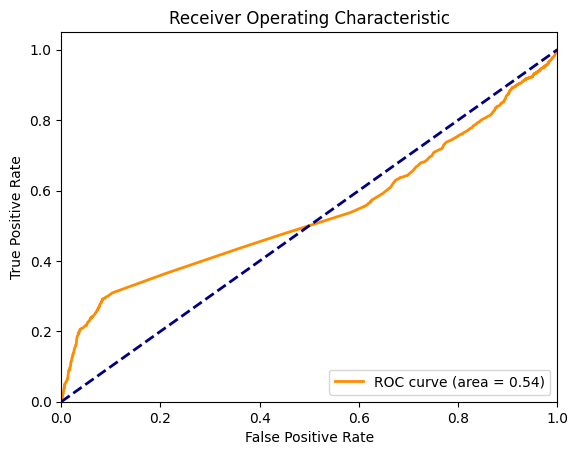

In [220]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# [your existing code here]

# Compute ROC curve and ROC area for the test set
fpr, tpr, _ = roc_curve(y_test, y_pred_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

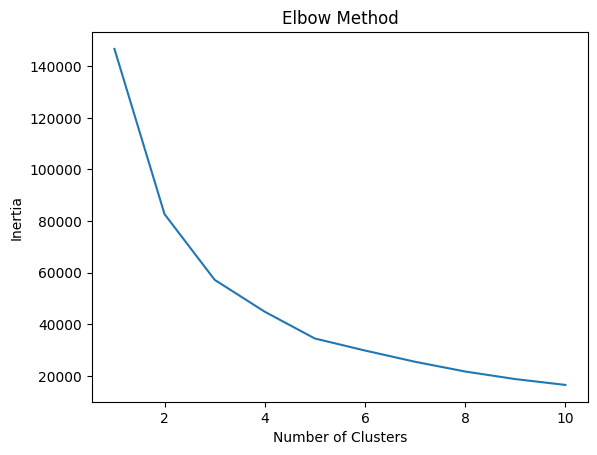

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-221-59998caa18fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.labels_


          PAY_1_0   PAY_1_1   PAY_1_2   PAY_1_3   PAY_1_4   PAY_1_5   PAY_1_6  \
Cluster                                                                         
0        0.765483  0.128819  0.088907  0.011836  0.002615  0.001101  0.000413   
1        0.735514  0.140102  0.107160  0.011907  0.002937  0.000714  0.000397   
2        0.972822  0.017770  0.008711  0.000000  0.000348  0.000348  0.000000   

          PAY_1_7   PAY_1_8     SEX_1  ...  MARRIAGE_2  MARRIAGE_3  \
Cluster                                ...                           
0        0.000138  0.000688  0.410955  ...    0.998486    0.001307   
1        0.000556  0.000714  0.373948  ...    0.018177    0.027227   
2        0.000000  0.000000  0.419861  ...    0.426829    0.005226   

             LIMIT_BAL        AGE      PAY_AMT1      PAY_AMT2      PAY_AMT3  \
Cluster                                                                       
0        140802.895679  30.806634   3691.528076   3790.732108   3315.825489   
1     

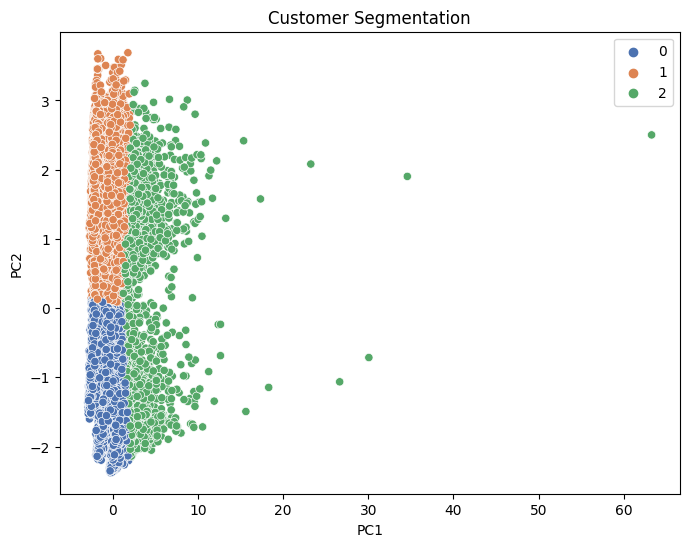

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Select relevant features for segmentation
X = df_final[[ 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3',
       'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'SEX_1','SEX_2','EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4','MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]


# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determine optimal number of clusters using elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply k-means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Add the cluster labels to the original dataset
X['Cluster'] = kmeans.labels_
print(X.groupby('Cluster').mean())


# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette='deep')
plt.title('Customer Segmentation')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


The cluster characteristics show the proportions (values between 0 and 1) of different categories within each feature for each cluster.
For example, in Cluster 0, the most dominant category in the 'PAY_1' feature is 'PAY_1_0' with a proportion of 0.765483, followed by 'PAY_1_1' with 0.128819, 'PAY_1_2' with 0.088907, and so on.
Similarly, for other features such as 'SEX', 'EDUCATION', 'MARRIAGE', the proportions of different categories are provided for each cluster.
The 'LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' columns represent the mean values of these features for each cluster.
For example, in Cluster 0, the mean 'LIMIT_BAL' (credit limit) is 140,802.90, the mean 'AGE' is 30.81, and the mean payment amounts ('PAY_AMT1' to 'PAY_AMT6') are also provided.
This report provides an overview of the cluster characteristics, proportions of different categories within each feature, and mean values for certain features across clusters. It helps to understand the composition and differences between the clusters in terms of feature distributions and average values.

The top three models based on the Test Accuracy to identify the default rate are Decision Tree Classifier, Adaboost Classifier, and RNN.